# EDA UK cars

**Loss in value**
- compare cars within a car class (e.g. small car from all makes) - yuliya
- compare models within 1 make - mirza
- uk vs germany - alex

In [1]:
# import pandas, numpy, datetime module
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta

import datetime
import time
import re

# import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import formattings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

RSEED = 3

# Setting plt style
plt.style.use('fivethirtyeight')

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#00135D', '#00135D']
sns.set_palette(sns.color_palette(sns_colors))

primary = '#FF6D43'
secondary = '#00135D'

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3']
sns.set_palette(sns.color_palette(sns_colors))

sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3', '#949494', 
              '#A1A1A1', '#ADADAD', '#BABABA', '#C7C7C7', '#D4D4D4', '#D4D4D4', '#D4D4D4', 
              '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4', '#D4D4D4']

In [2]:
sns.set_style("whitegrid",
            {"grid.color": "#EBEBEB",
            "grid.linestyle": ":",
             
            'axes.facecolor': 'white',
            'axes.edgecolor': '#00135D',
             
            'text.color': '#00135D',
            'xtick.color': '#212121',
            'ytick.color': '#212121',
             
            'axes.grid': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,
             
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False})

### import the data for uk cars

In [3]:
df = pd.read_csv('../data/allcars_uk.csv')

In [4]:
df

model  registration       gear    fuel  tax   mpg  engineSize   
0           A1          2017     Manual  Petrol  150 55.40        1.40  \
1           A1          2016     Manual  Petrol   30 55.40        1.40   
2           A3          2019     Manual  Petrol  145 49.60        1.00   
3           A1          2016  Automatic  Petrol   30 58.90        1.40   
4           A3          2015     Manual  Petrol   20 60.10        1.40   
...        ...           ...        ...     ...  ...   ...         ...   
27183  C Class          2019  Automatic  Diesel  145 61.40        2.00   
27184  A Class          2017  Automatic  Diesel  145 68.90        2.10   
27185  C Class          2019  Automatic  Diesel  145 61.40        2.00   
27186  C Class          2020  Automatic  Diesel  145 64.20        2.00   
27187  C Class          2020  Automatic  Diesel  145 55.40        2.00   

                make  car_age    price  mileage                    car   
0               Audi        6 14250.00 25317.62                Audi A1  \
1               Audi        7 12540.00 48183.11                Audi A1   
2               Audi        4 19722.00  3214.78                Audi A3   
3               Audi        7 15846.00 51906.34                Audi A1   
4               Audi        8 11628.00 74194.21                Audi A3   
...              ...      ...      ...      ...                    ...   
27183  Mercedes-Benz        4 28498.86  9756.98  Mercedes-Benz C Class   
27184  Mercedes-Benz        6 18808.86 32947.49  Mercedes-Benz A Class   
27185  Mercedes-Benz        4 34654.86  8045.00  Mercedes-Benz C Class   
27186  Mercedes-Benz        3 35338.86  1609.00  Mercedes-Benz C Class   
27187  Mercedes-Benz        3 41038.86   804.50  Mercedes-Benz C Class   

                  class  
0             Small car  
1             Small car  
2      Small family car  
3             Small car  
4      Small family car  
...                 ...  
27183  Large family car  
27184  Small family car  
27185  Large family car  
27186  Large family car  
27187  Large family car  

[27188 rows x 13 columns]

In [4]:
df.groupby(['registration', 'model']).count()['price']

registration  model   
2012          1 Series     34
              3 Series     39
              A Class       2
              A1           21
              A3           13
                         ... 
2020          Passat       57
              Polo        151
              Q3          133
              Tiguan      107
              X1           35
Name: price, Length: 129, dtype: int64

### rename the column "europrice" to "price" according to the data of german cars

In [5]:
df = df.rename(columns={'europrice': 'price'})

### import the data for german cars

In [114]:
german = pd.read_csv('../data/df_ml.csv')

In [115]:
df

model  registration       gear    fuel  tax   mpg  engineSize  \
0           A1          2017     Manual  Petrol  150 55.40        1.40   
1           A1          2016     Manual  Petrol   30 55.40        1.40   
2           A3          2019     Manual  Petrol  145 49.60        1.00   
3           A1          2016  Automatic  Petrol   30 58.90        1.40   
4           A3          2015     Manual  Petrol   20 60.10        1.40   
...        ...           ...        ...     ...  ...   ...         ...   
27183  C Class          2019  Automatic  Diesel  145 61.40        2.00   
27184  A Class          2017  Automatic  Diesel  145 68.90        2.10   
27185  C Class          2019  Automatic  Diesel  145 61.40        2.00   
27186  C Class          2020  Automatic  Diesel  145 64.20        2.00   
27187  C Class          2020  Automatic  Diesel  145 55.40        2.00   

                make  car_age    price  mileage                    car  \
0               Audi        6 14250.00 25317.62                Audi A1   
1               Audi        7 12540.00 48183.11                Audi A1   
2               Audi        4 19722.00  3214.78                Audi A3   
3               Audi        7 15846.00 51906.34                Audi A1   
4               Audi        8 11628.00 74194.21                Audi A3   
...              ...      ...      ...      ...                    ...   
27183  Mercedes-Benz        4 28498.86  9756.98  Mercedes-Benz C Class   
27184  Mercedes-Benz        6 18808.86 32947.49  Mercedes-Benz A Class   
27185  Mercedes-Benz        4 34654.86  8045.00  Mercedes-Benz C Class   
27186  Mercedes-Benz        3 35338.86  1609.00  Mercedes-Benz C Class   
27187  Mercedes-Benz        3 41038.86   804.50  Mercedes-Benz C Class   

                  class  
0             Small car  
1             Small car  
2      Small family car  
3             Small car  
4      Small family car  
...                 ...  
27183  Large family car  
27184  Small family car  
27185  Large family car  
27186  Large family car  
27187  Large family car  

[27188 rows x 13 columns]

In [116]:
german

make           model    price            fuel  mileage       gear  \
0     Volkswagen        Polo GTI 34690.00          Petrol    10.00  Automatic   
1     Volkswagen        Polo GTI 34950.00          Petrol  1500.00  Automatic   
2     Volkswagen        Polo GTI 29990.00          Petrol  9000.00  Automatic   
3     Volkswagen        Polo GTI 33989.00          Petrol  3511.00  Automatic   
4     Volkswagen        Polo GTI 37980.00          Petrol   211.00  Automatic   
...          ...             ...      ...             ...      ...        ...   
9712         BMW              X1 35994.00  Electro/Petrol 32082.00  Automatic   
9713         BMW              X1 38200.00  Electro/Petrol 13000.00  Automatic   
9714  Volkswagen  Passat Variant 35185.00  Electro/Petrol 75226.00  Automatic   
9715        Audi              A3 24980.00  Electro/Petrol 57509.00  Automatic   
9716        Audi              A3 24480.00  Electro/Petrol 89676.00  Automatic   

      registration     hp  owner           body          car_condition  \
0          2023.00 152.00   1.00          Sedan  Demonstration vehicle   
1          2023.00 152.00   1.00          Sedan  Demonstration vehicle   
2          2023.00 152.00   1.00          Sedan  Demonstration vehicle   
3          2023.00 152.00   1.00          Sedan  Demonstration vehicle   
4          2023.00 152.00   1.00      Small car  Demonstration vehicle   
...            ...    ...    ...            ...                    ...   
9712       2020.00 162.00   1.00            SUV                   Used   
9713       2020.00  92.00   1.00            SUV                   Used   
9714       2019.00 115.00   1.00  Station wagon                   Used   
9715       2018.00 150.00   1.00          Sedan                   Used   
9716       2018.00 150.00   1.00          Sedan                   Used   

      consumption  emission   color  displacement drive_type  \
0            4.20    138.00    Gray          1.98      Front   
1            6.60    138.00   Black          2.00       Rear   
2            7.40    138.00   White          1.98      Front   
3            5.80    138.00   Black          1.98      Front   
4            5.70    138.00   White          1.98      Front   
...           ...       ...     ...           ...        ...   
9712         1.90     43.00   Black          1.50   Four.w.d   
9713         1.90     43.00    Blue          1.50   Four.w.d   
9714         1.70     38.00  Silver          1.40      Front   
9715         1.80     40.00     Red          1.40      Front   
9716         1.80     40.00   White          1.40      Front   

             car_class  car_age                        car  
0            Small car     0.00        Volkswagen Polo GTI  
1            Small car     0.00        Volkswagen Polo GTI  
2            Small car     0.00        Volkswagen Polo GTI  
3            Small car     0.00        Volkswagen Polo GTI  
4            Small car     0.00        Volkswagen Polo GTI  
...                ...      ...                        ...  
9712       Compact SUV     3.00                     BMW X1  
9713       Compact SUV     3.00                     BMW X1  
9714  Large family car     4.00  Volkswagen Passat Variant  
9715  Small family car     5.00                    Audi A3  
9716  Small family car     5.00                    Audi A3  

[9717 rows x 19 columns]

### rename the columsn in german table

In [9]:
german = german.rename(columns={'car_make_model': 'car'})

# Histogramm plot

### histplot for prices uk

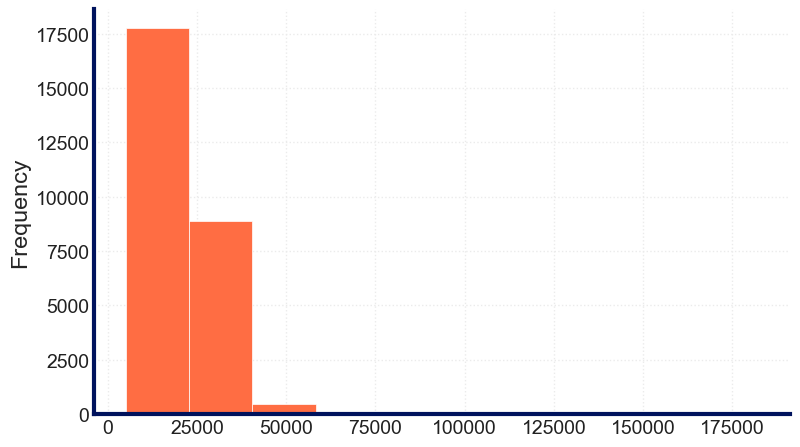

In [10]:
# histplot
df['price'].plot(kind='hist',);

### hisplot of prices germany

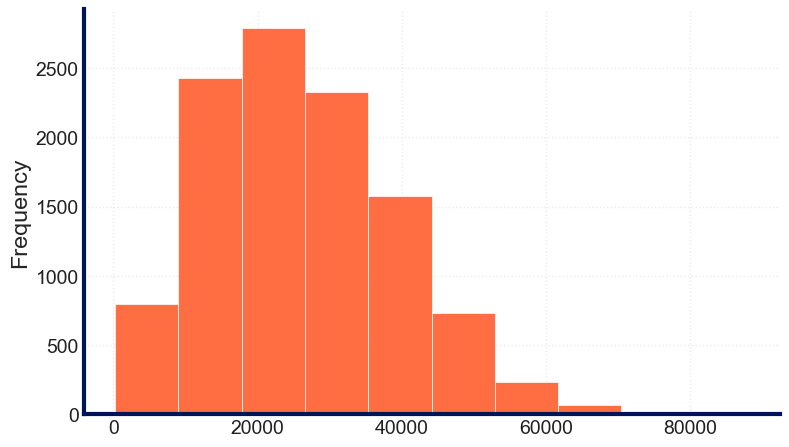

In [11]:
# histplot
german['price'].plot(kind='hist',);

### histplot permission, uk

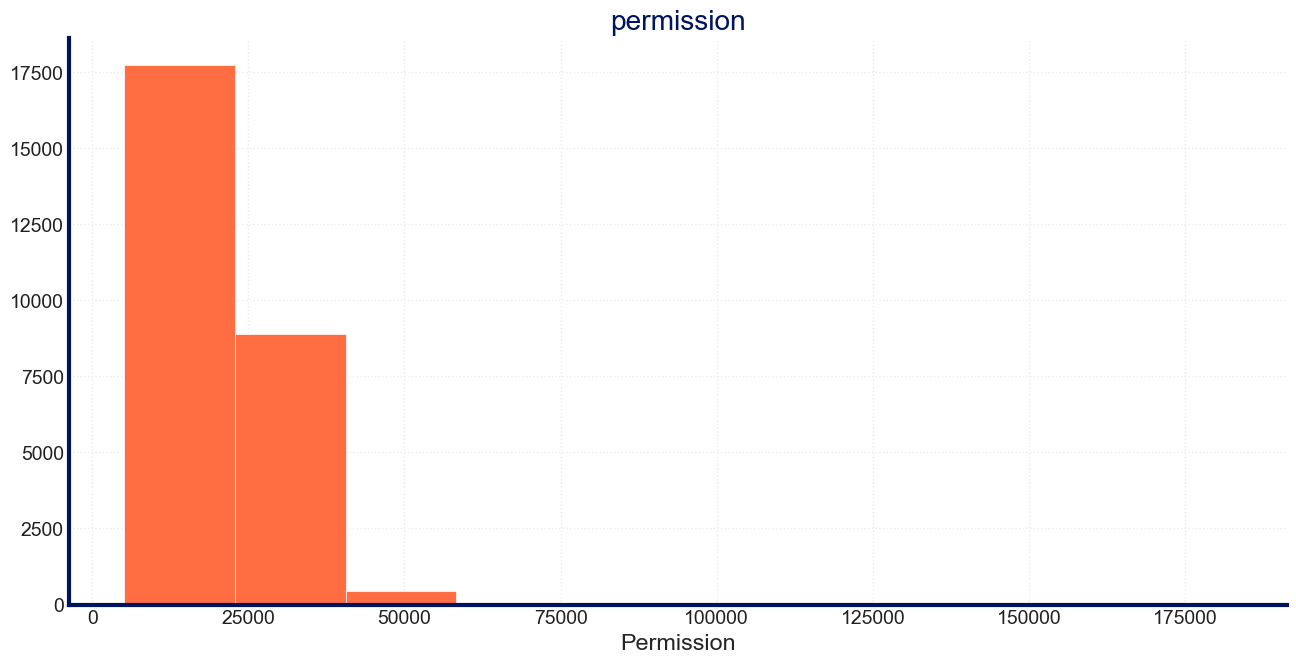

In [12]:
plt.figure(figsize=(14,7))
df.price.hist() 
plt.title("permission")
plt.xlabel('Permission')
plt.show()

### histplot permission, german

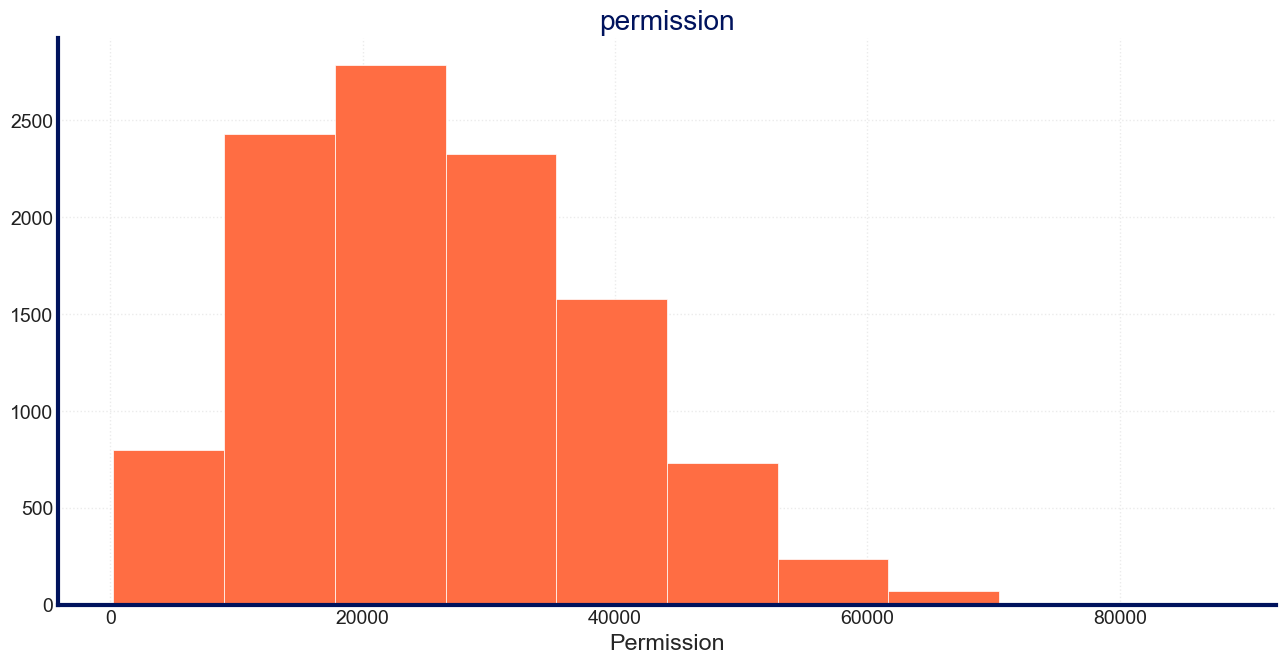

In [13]:
plt.figure(figsize=(14,7))
german.price.hist() 
plt.title("permission")
plt.xlabel('Permission')
plt.show()

### hisplot transmission uk vs. german

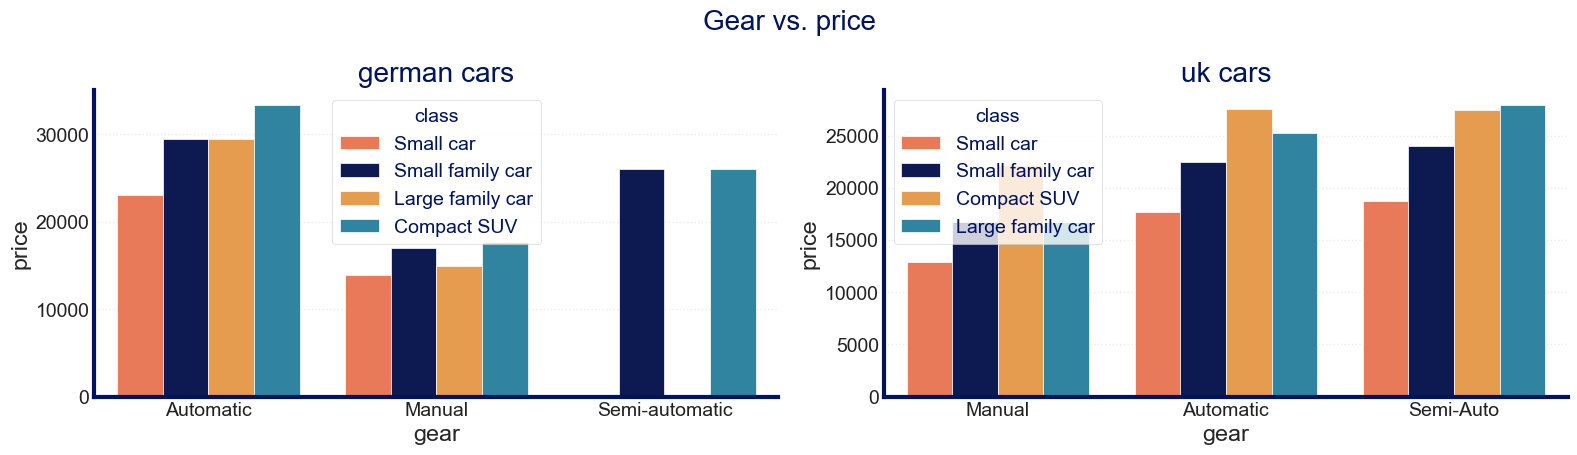

In [14]:
plt.figure(figsize=(16,8))
plt.suptitle('Gear vs. price', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(x="gear", y="price",  data=german, hue="class", ci= None);
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.barplot(x="gear", y="price",  data=df, hue="class", ci= None);
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### hisplot year vs. price

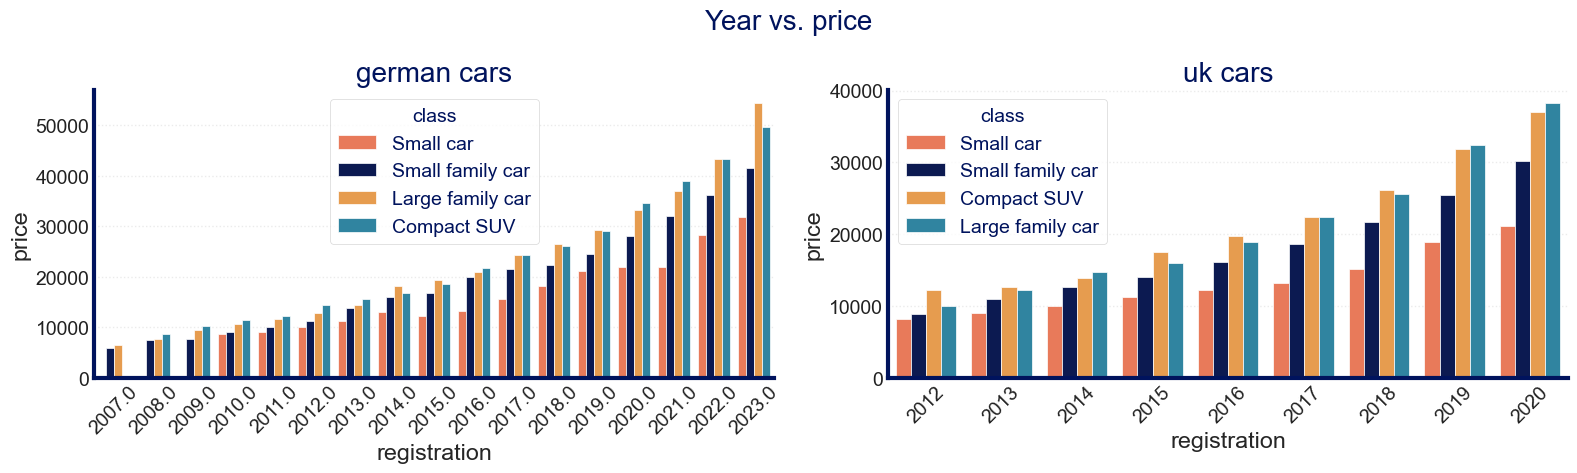

In [15]:
plt.figure(figsize=(16,8))
plt.suptitle('Year vs. price', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(x="registration", y="price",  data=german, hue="class", ci= None);
plt.title('german cars')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)  
sns.barplot(x="registration", y="price",  data=df, hue="class", ci= None);
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.xticks(rotation=45);

### Price vs. age, uk and german

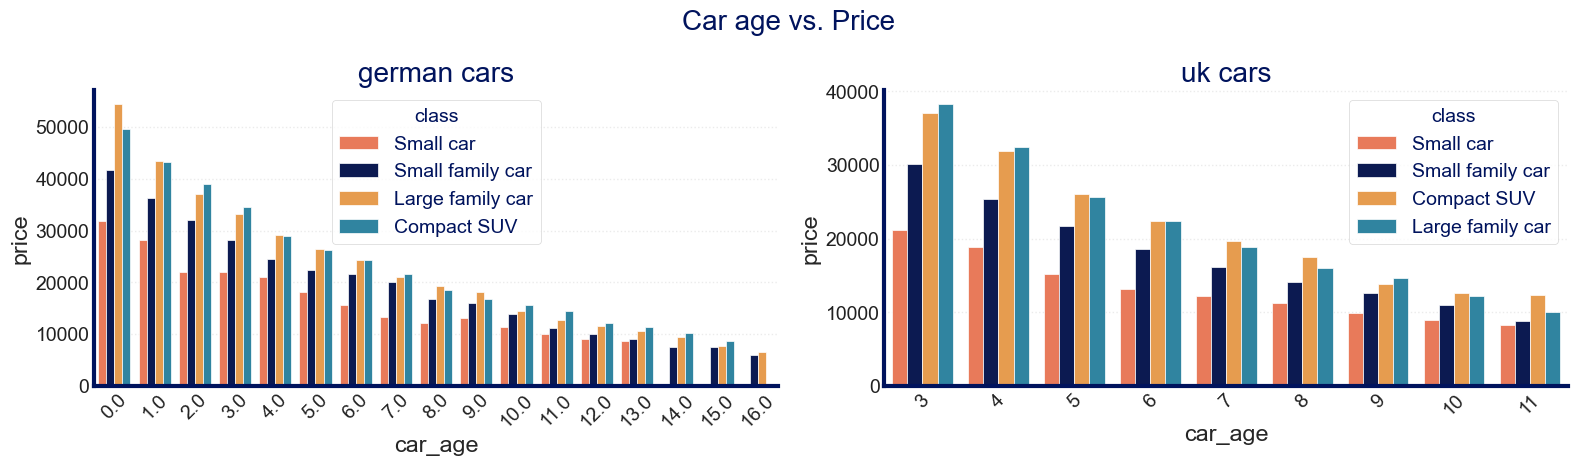

In [16]:
plt.figure(figsize=(16,8))
plt.suptitle('Car age vs. Price', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(x="car_age", y="price",  data=german, hue="class", ci= None);
plt.title('german cars')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)  
sns.barplot(x="car_age", y="price",  data=df, hue="class", ci= None);
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.xticks(rotation=45);

### Car age vs. price, uk and Germany

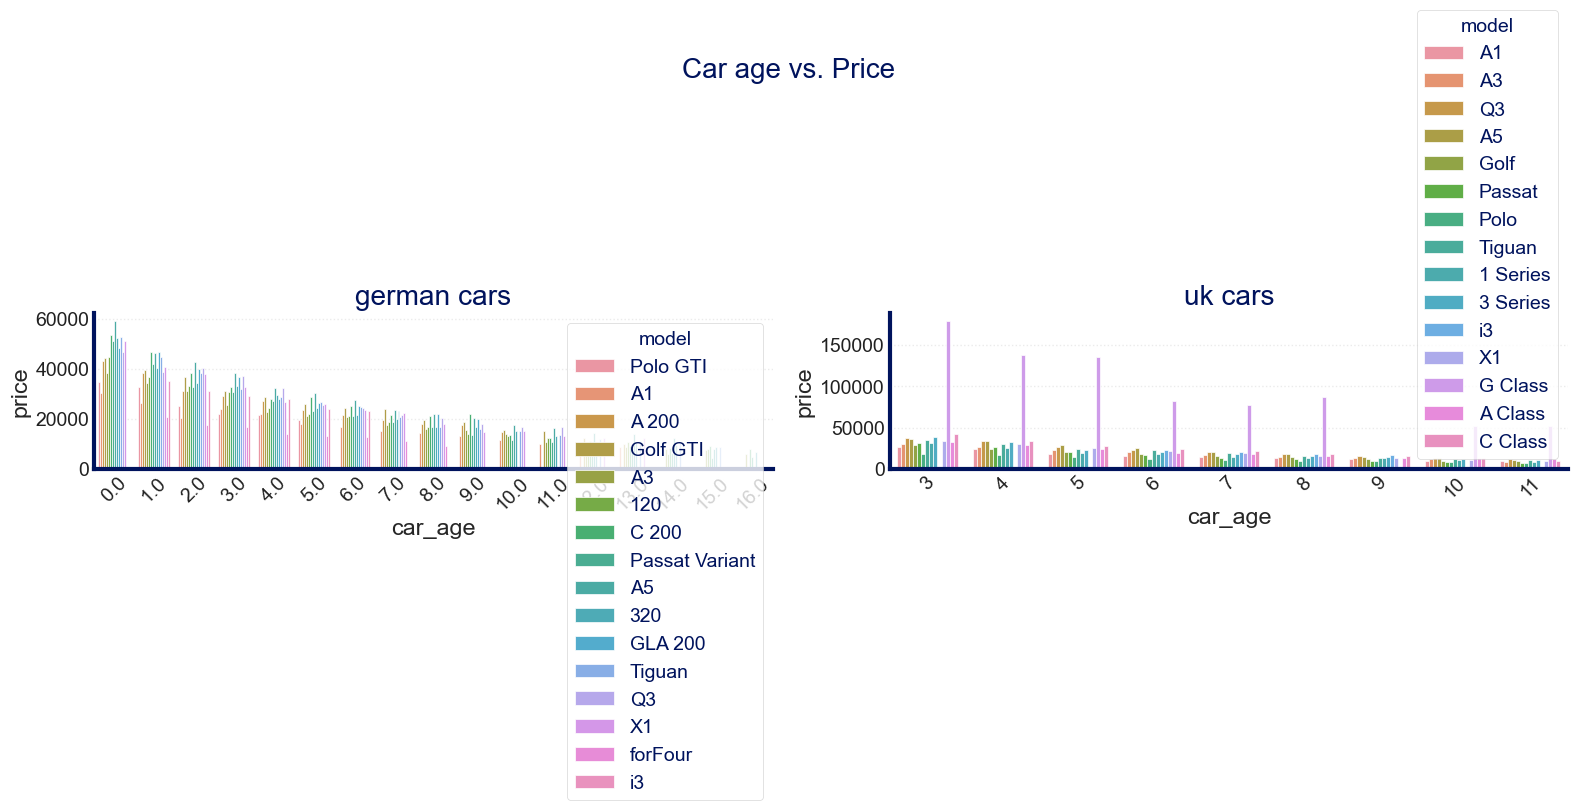

In [17]:
plt.figure(figsize=(16,8))
plt.suptitle('Car age vs. Price', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(x="car_age", y="price",  data=german, hue="model", ci= None);
plt.title('german cars')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)  
sns.barplot(x="car_age", y="price",  data=df, hue="model", ci= None);
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.xticks(rotation=45);

### histplot of all numerical datas of uk cars

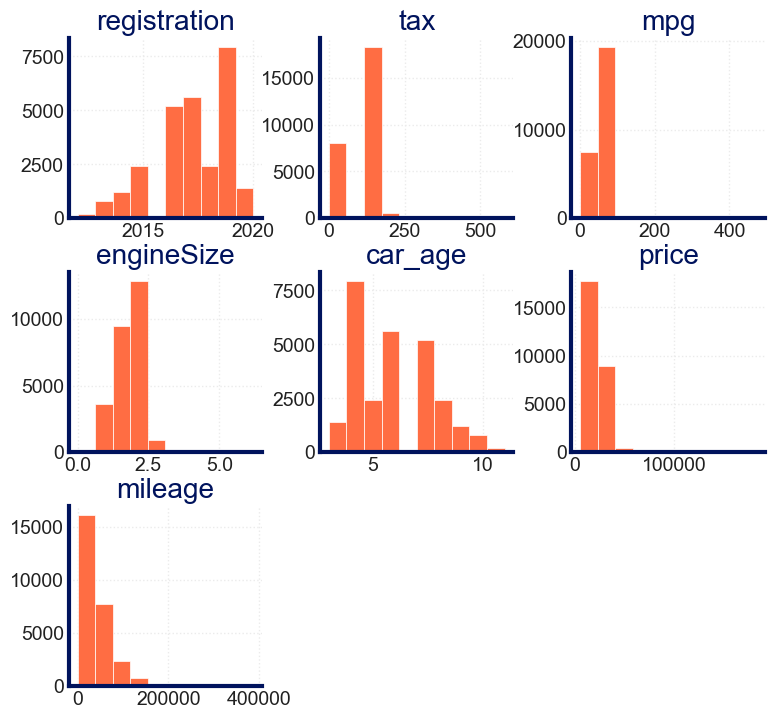

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

### histplot of all numerical datas for german cars

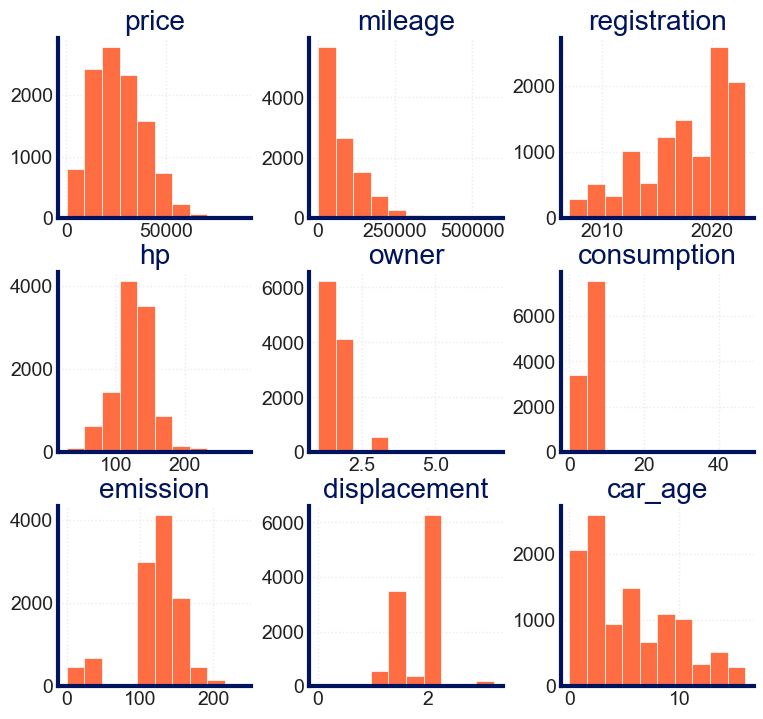

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
german.hist(ax = ax);

# Scatter plot

### scatter price to year uk

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


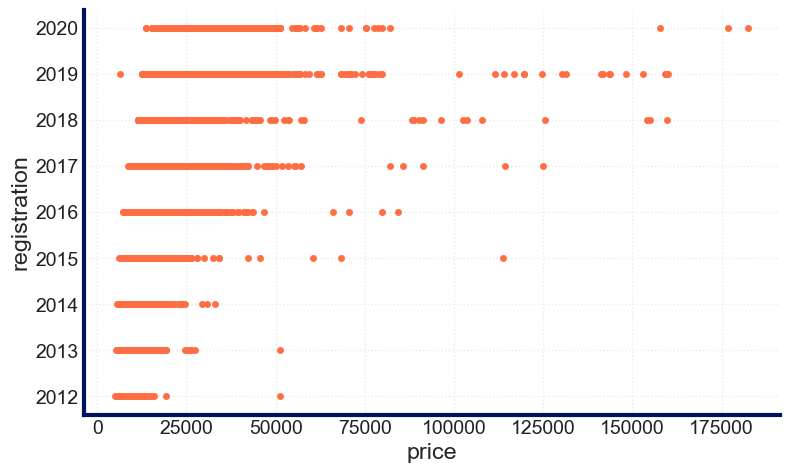

In [20]:
# scatter
df.plot(kind='scatter', x='price', y='registration');

### scatter price to registration year, germany

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


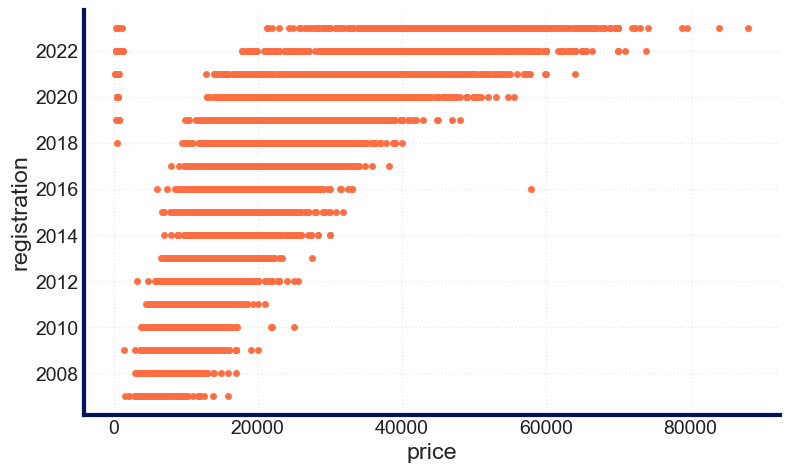

In [21]:
# scatter
german.plot(kind='scatter', x='price', y='registration');

### scatter uk cars price according to classes

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


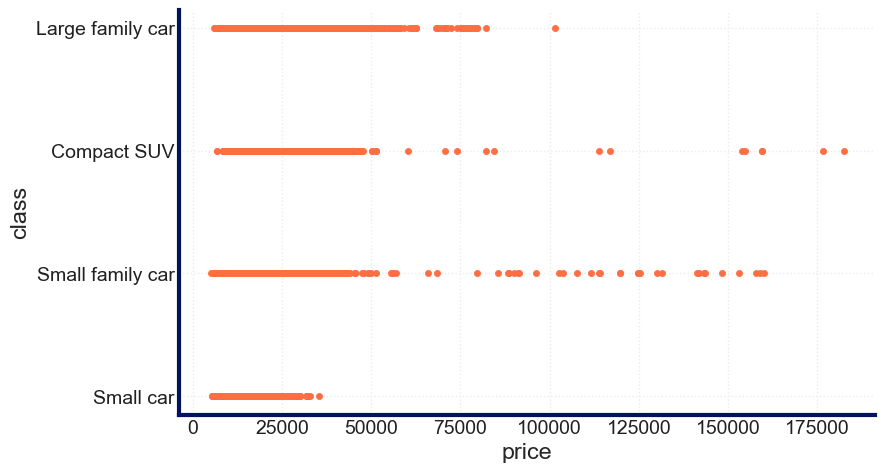

In [22]:
df.plot(kind='scatter', x='price', y='class');

### scatter german cars price according to class

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


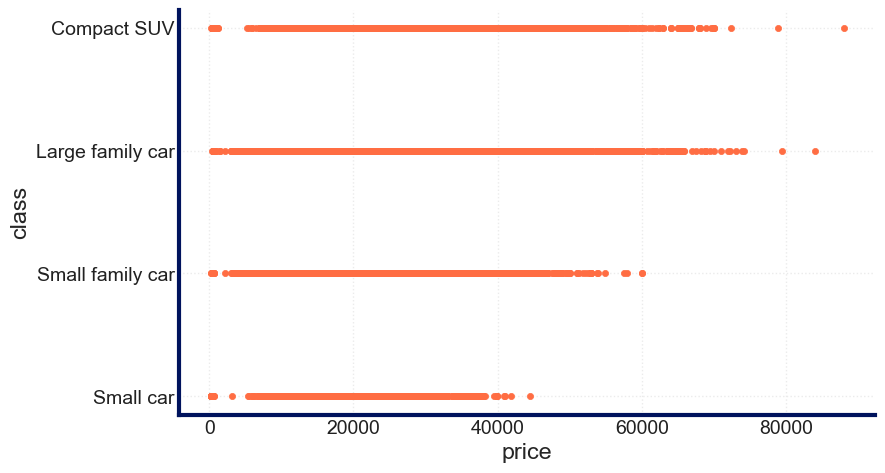

In [23]:
german.plot(kind='scatter', x='price', y='class');

### scatter uk cars price according to model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


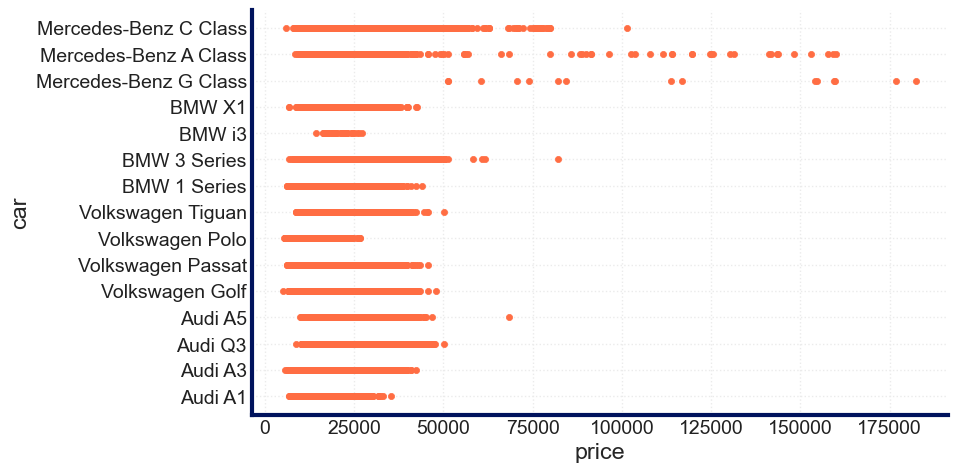

In [24]:
df.plot(kind='scatter', x='price', y='car');

### scatter german cars price according to model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


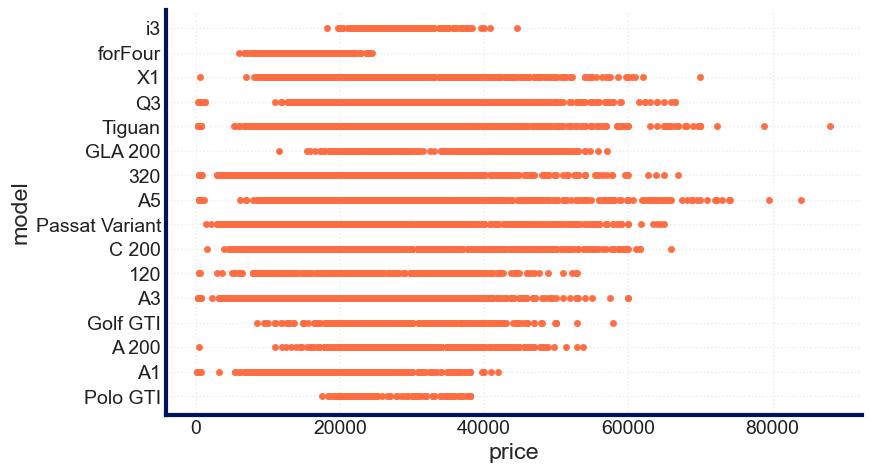

In [25]:
german.plot(kind='scatter', x='price', y='model');

# Catplot

### catplot price uk 

In [ ]:
sns.catplot(x="price", kind="count", data=df);
plt.xtricks(rotation=90)

### catplot price german

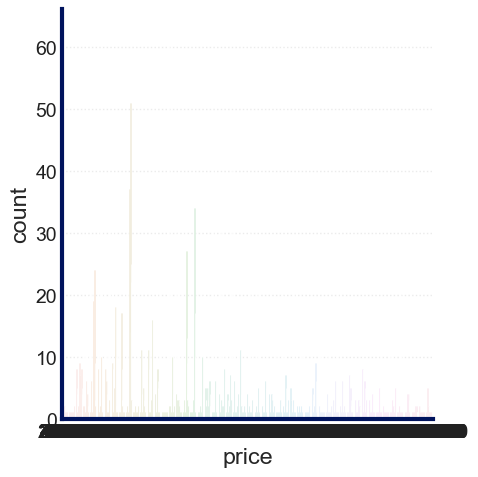

In [27]:
sns.catplot(x="price", kind="count", data=german);

### catplot model, uk

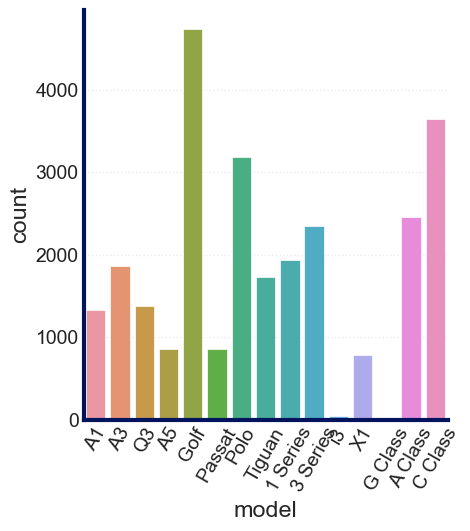

In [28]:
sns.catplot(x="model", kind="count", data=df)
plt.xticks(rotation=60);

### catplot model, german

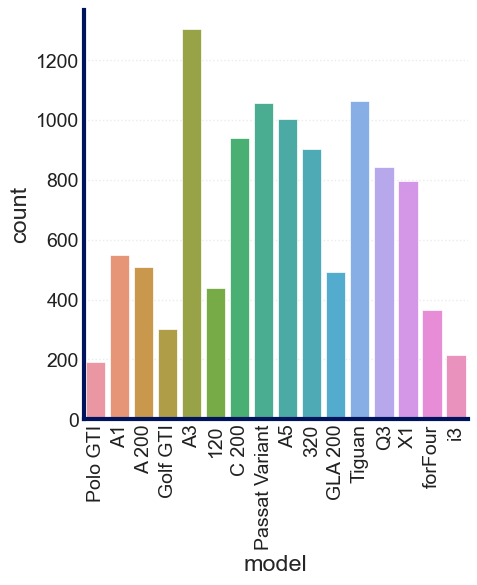

In [29]:
sns.catplot(x="model", kind="count", data=german)
plt.xticks(rotation=90);

 ## catplot with 2 plots, uk and german

### price vs. first registration

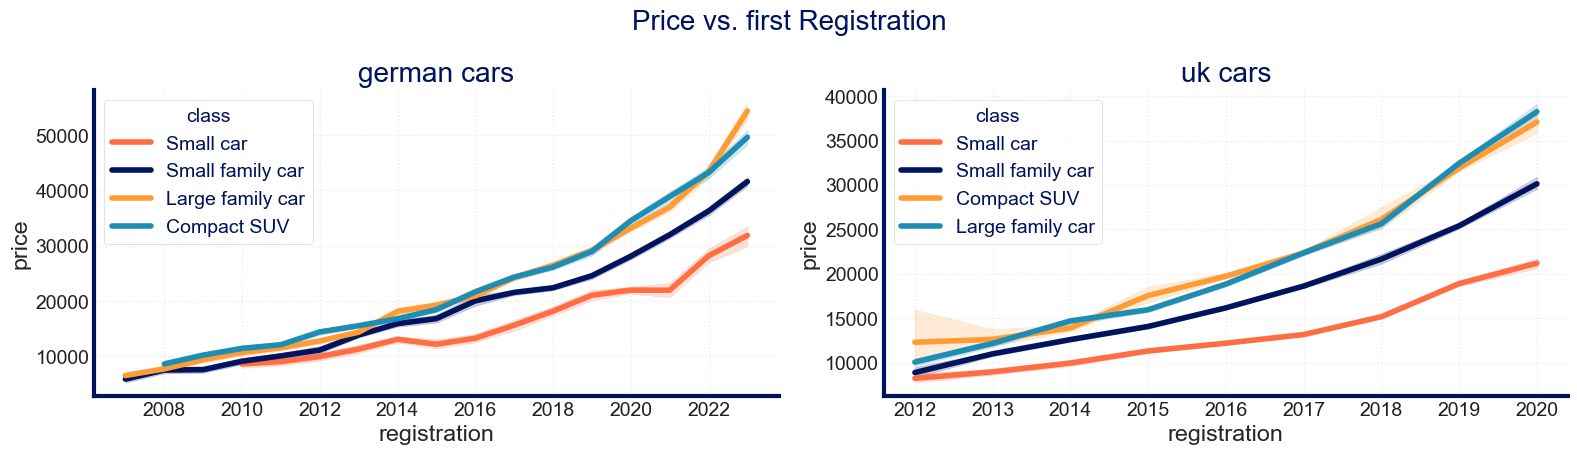

In [30]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. first Registration', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="registration", y="price",  data=german, hue="class");
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.lineplot(x="registration", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price vs. km

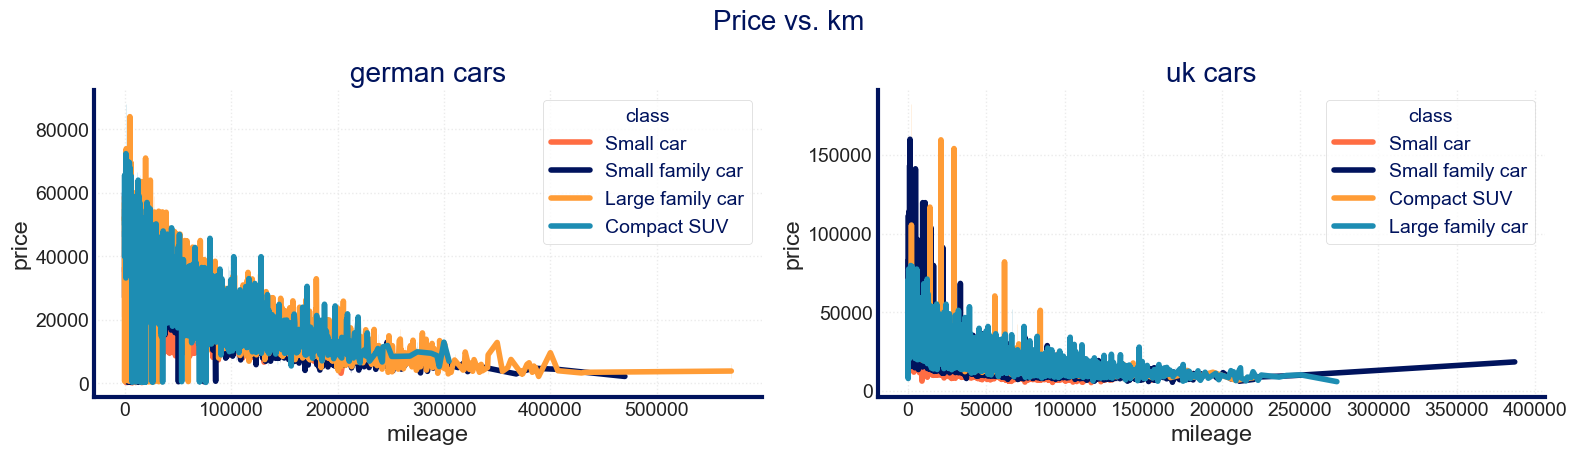

In [31]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. km', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="mileage", y="price",  data=german, hue="class");
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.lineplot(x="mileage", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price vs. age

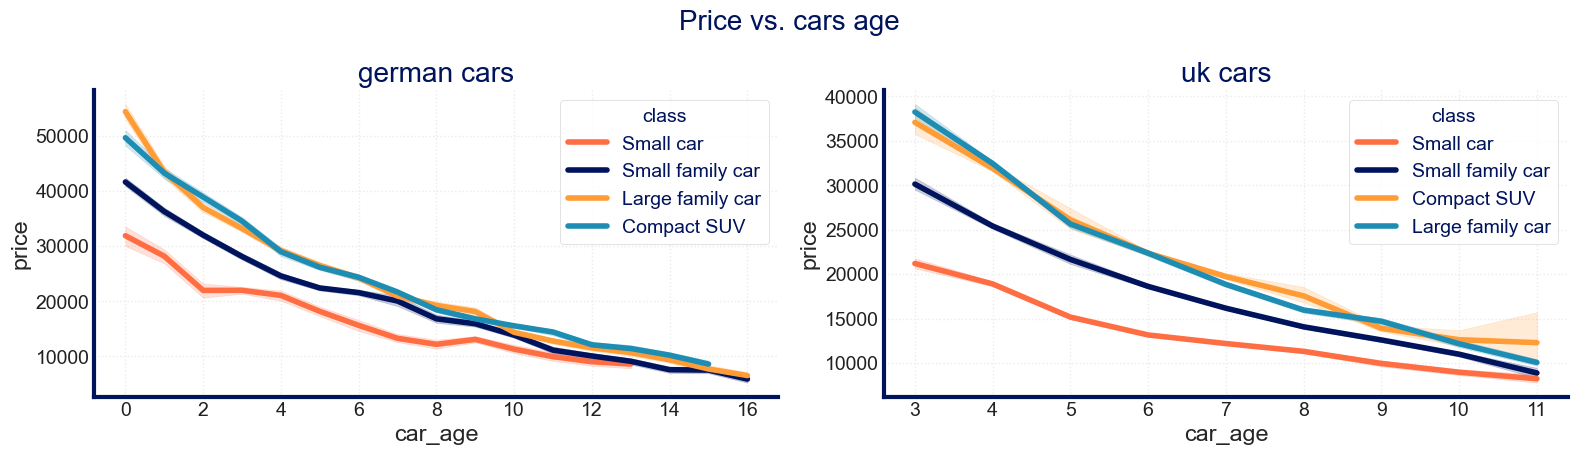

In [32]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. cars age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="price",  data=german, hue="class");
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.lineplot(x="car_age", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### catplot model and make, uk

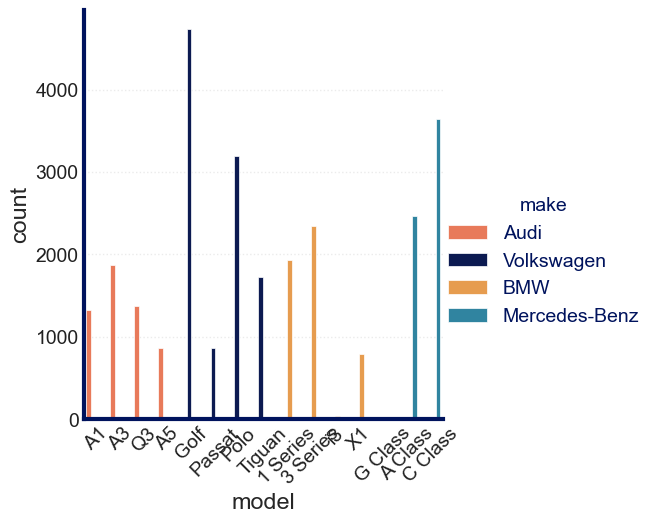

In [33]:
sns.catplot(data=df, kind='count', x='model', hue='make')
plt.xticks(rotation=45);

### catplot model and make, german

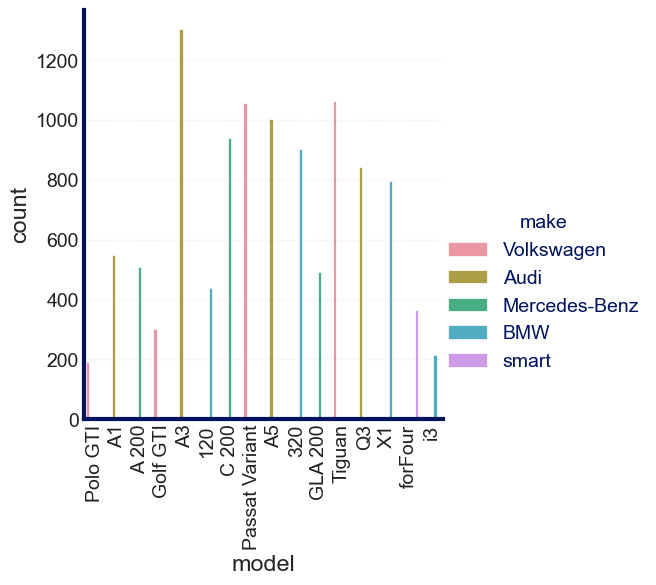

In [34]:
sns.catplot(data=german, kind='count', x='model', hue='make')
plt.xticks(rotation=90);

### catplot transmission, uk

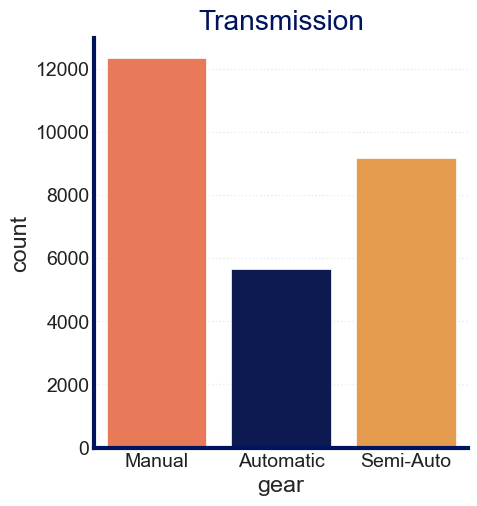

In [35]:
sns.catplot(x="gear", kind="count", data=df)
plt.title("Transmission");

### catplot transmission, german

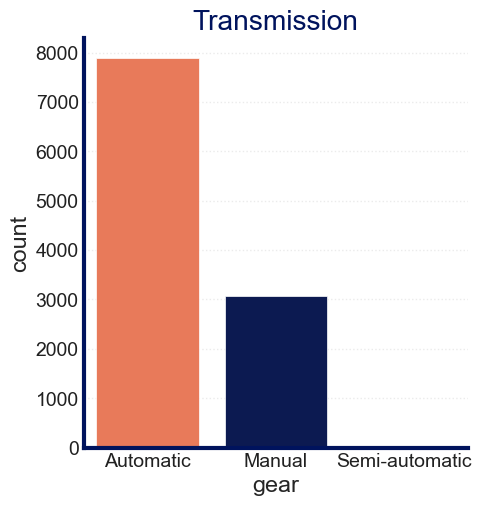

In [36]:
sns.catplot(x="gear", kind="count", data=german)
plt.title("Transmission");

### catplot transmission and model, uk

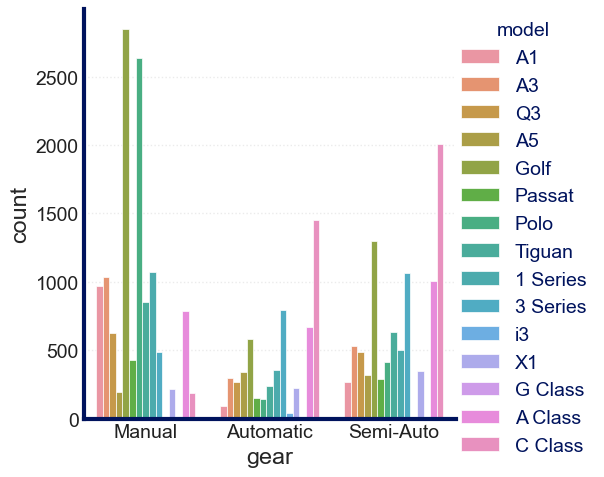

In [37]:
sns.catplot(data=df,kind='count',x='gear',hue='model');

### catplot transmission and model, german

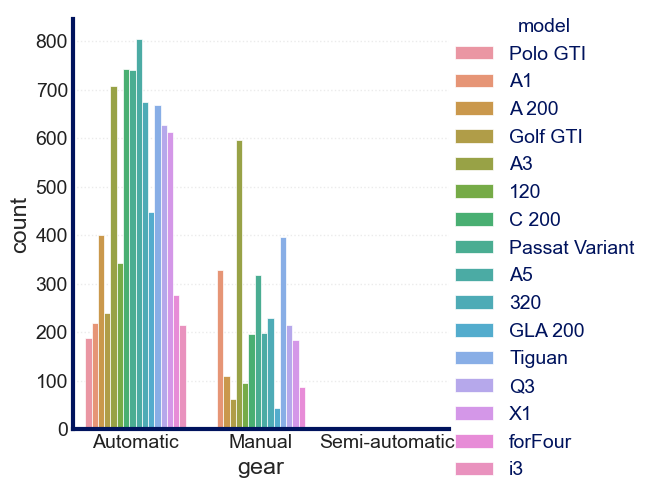

In [38]:
sns.catplot(data=german,kind='count',x='gear',hue='model');

# Pairplot

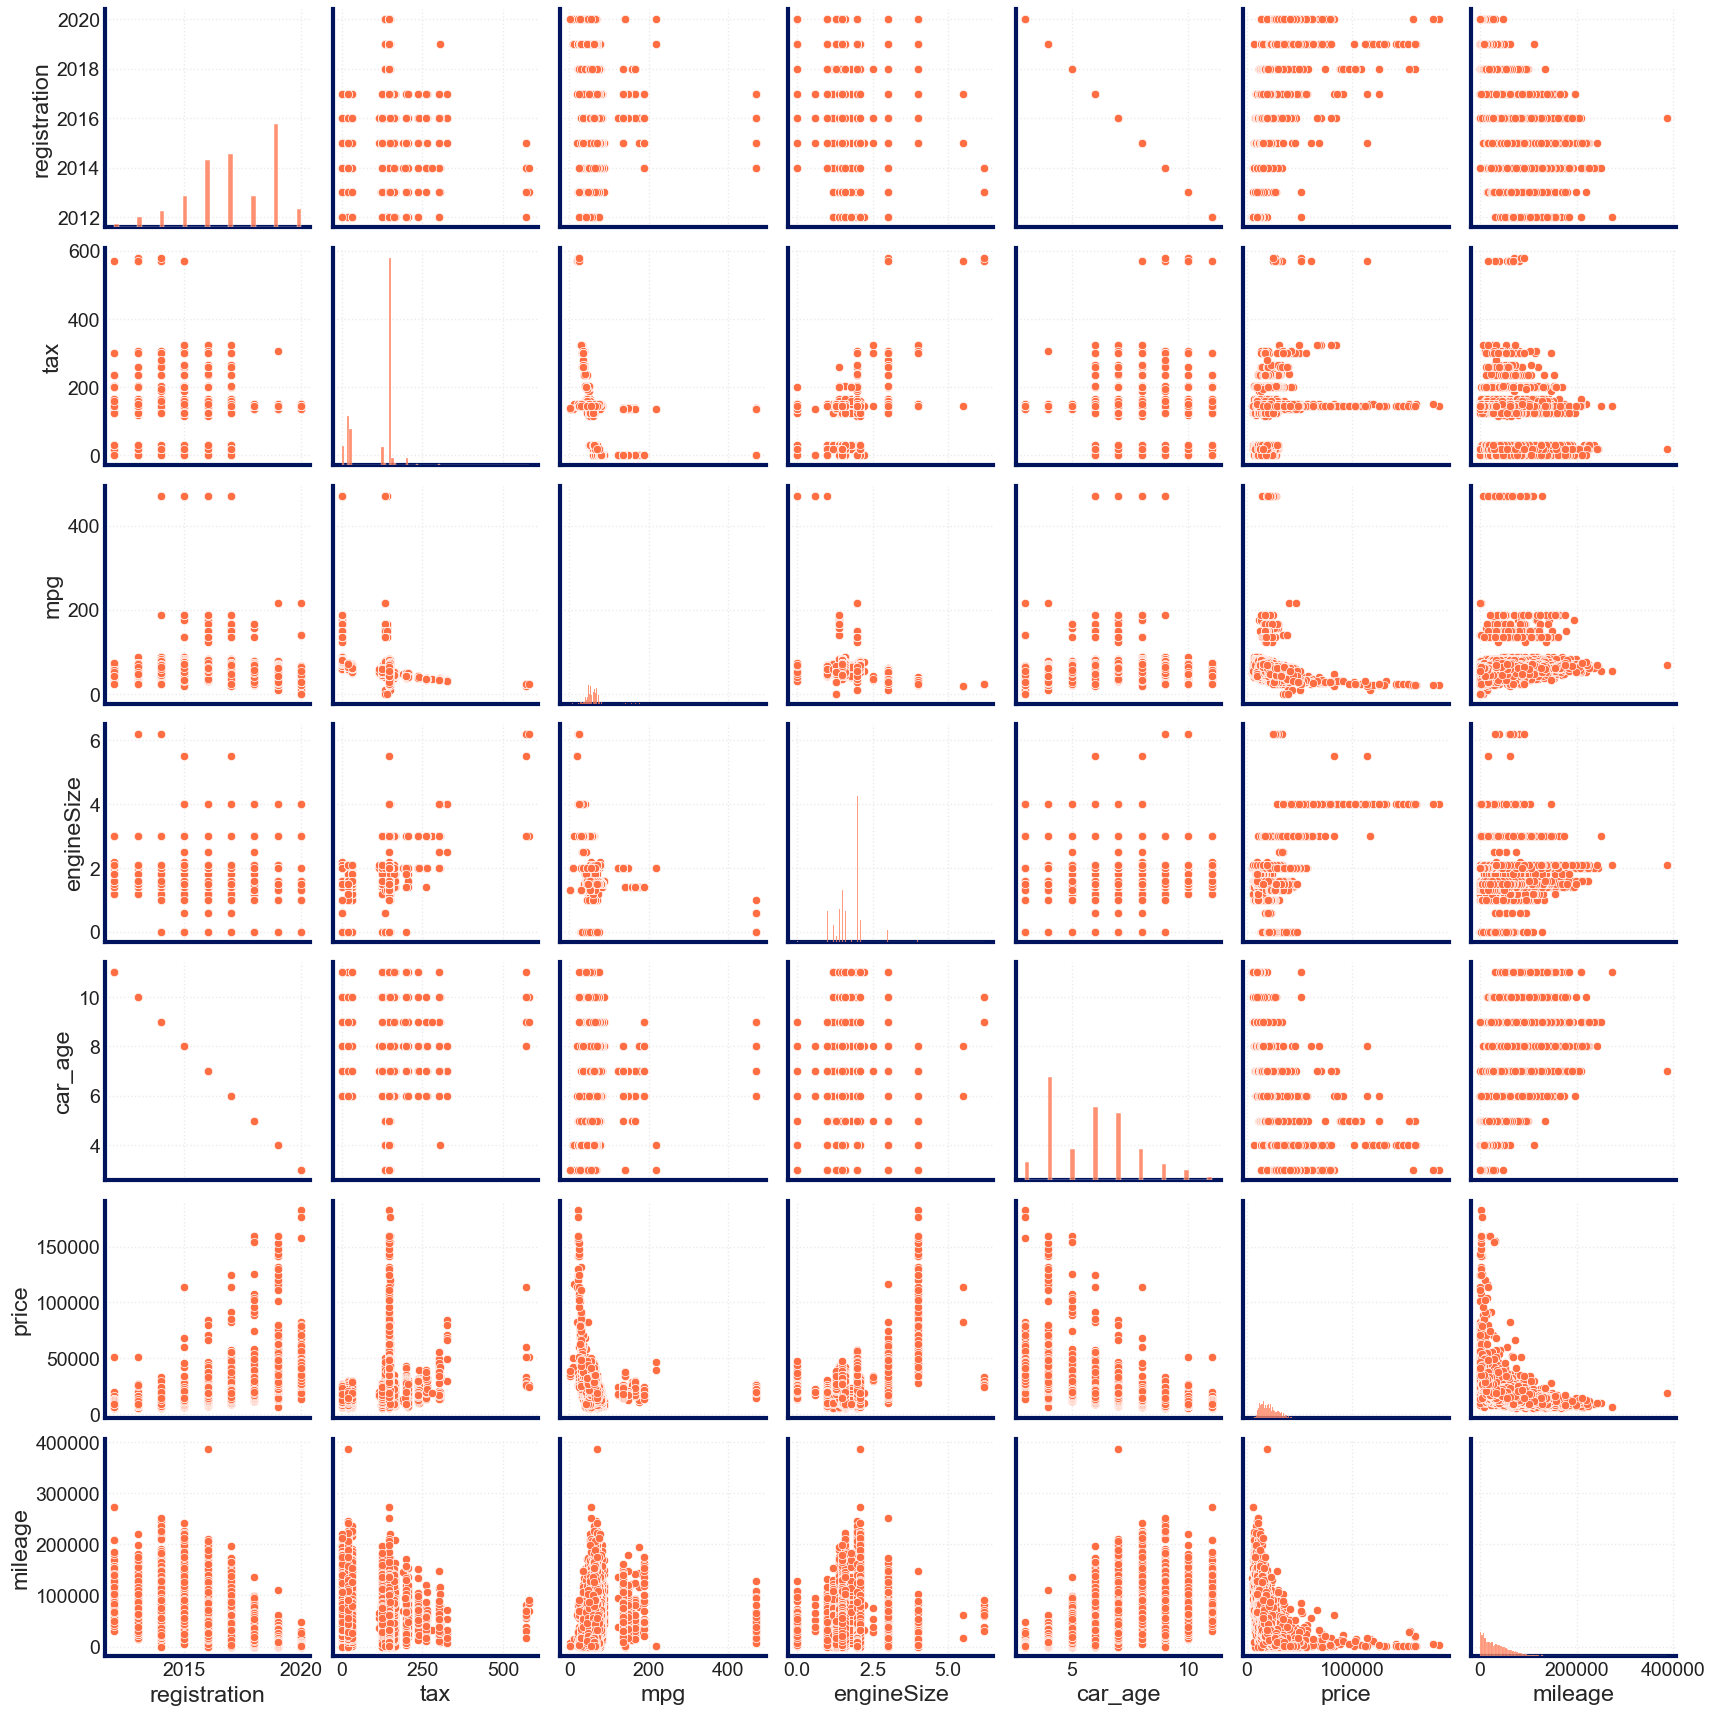

In [39]:
sns.pairplot(df);

### pairplot german

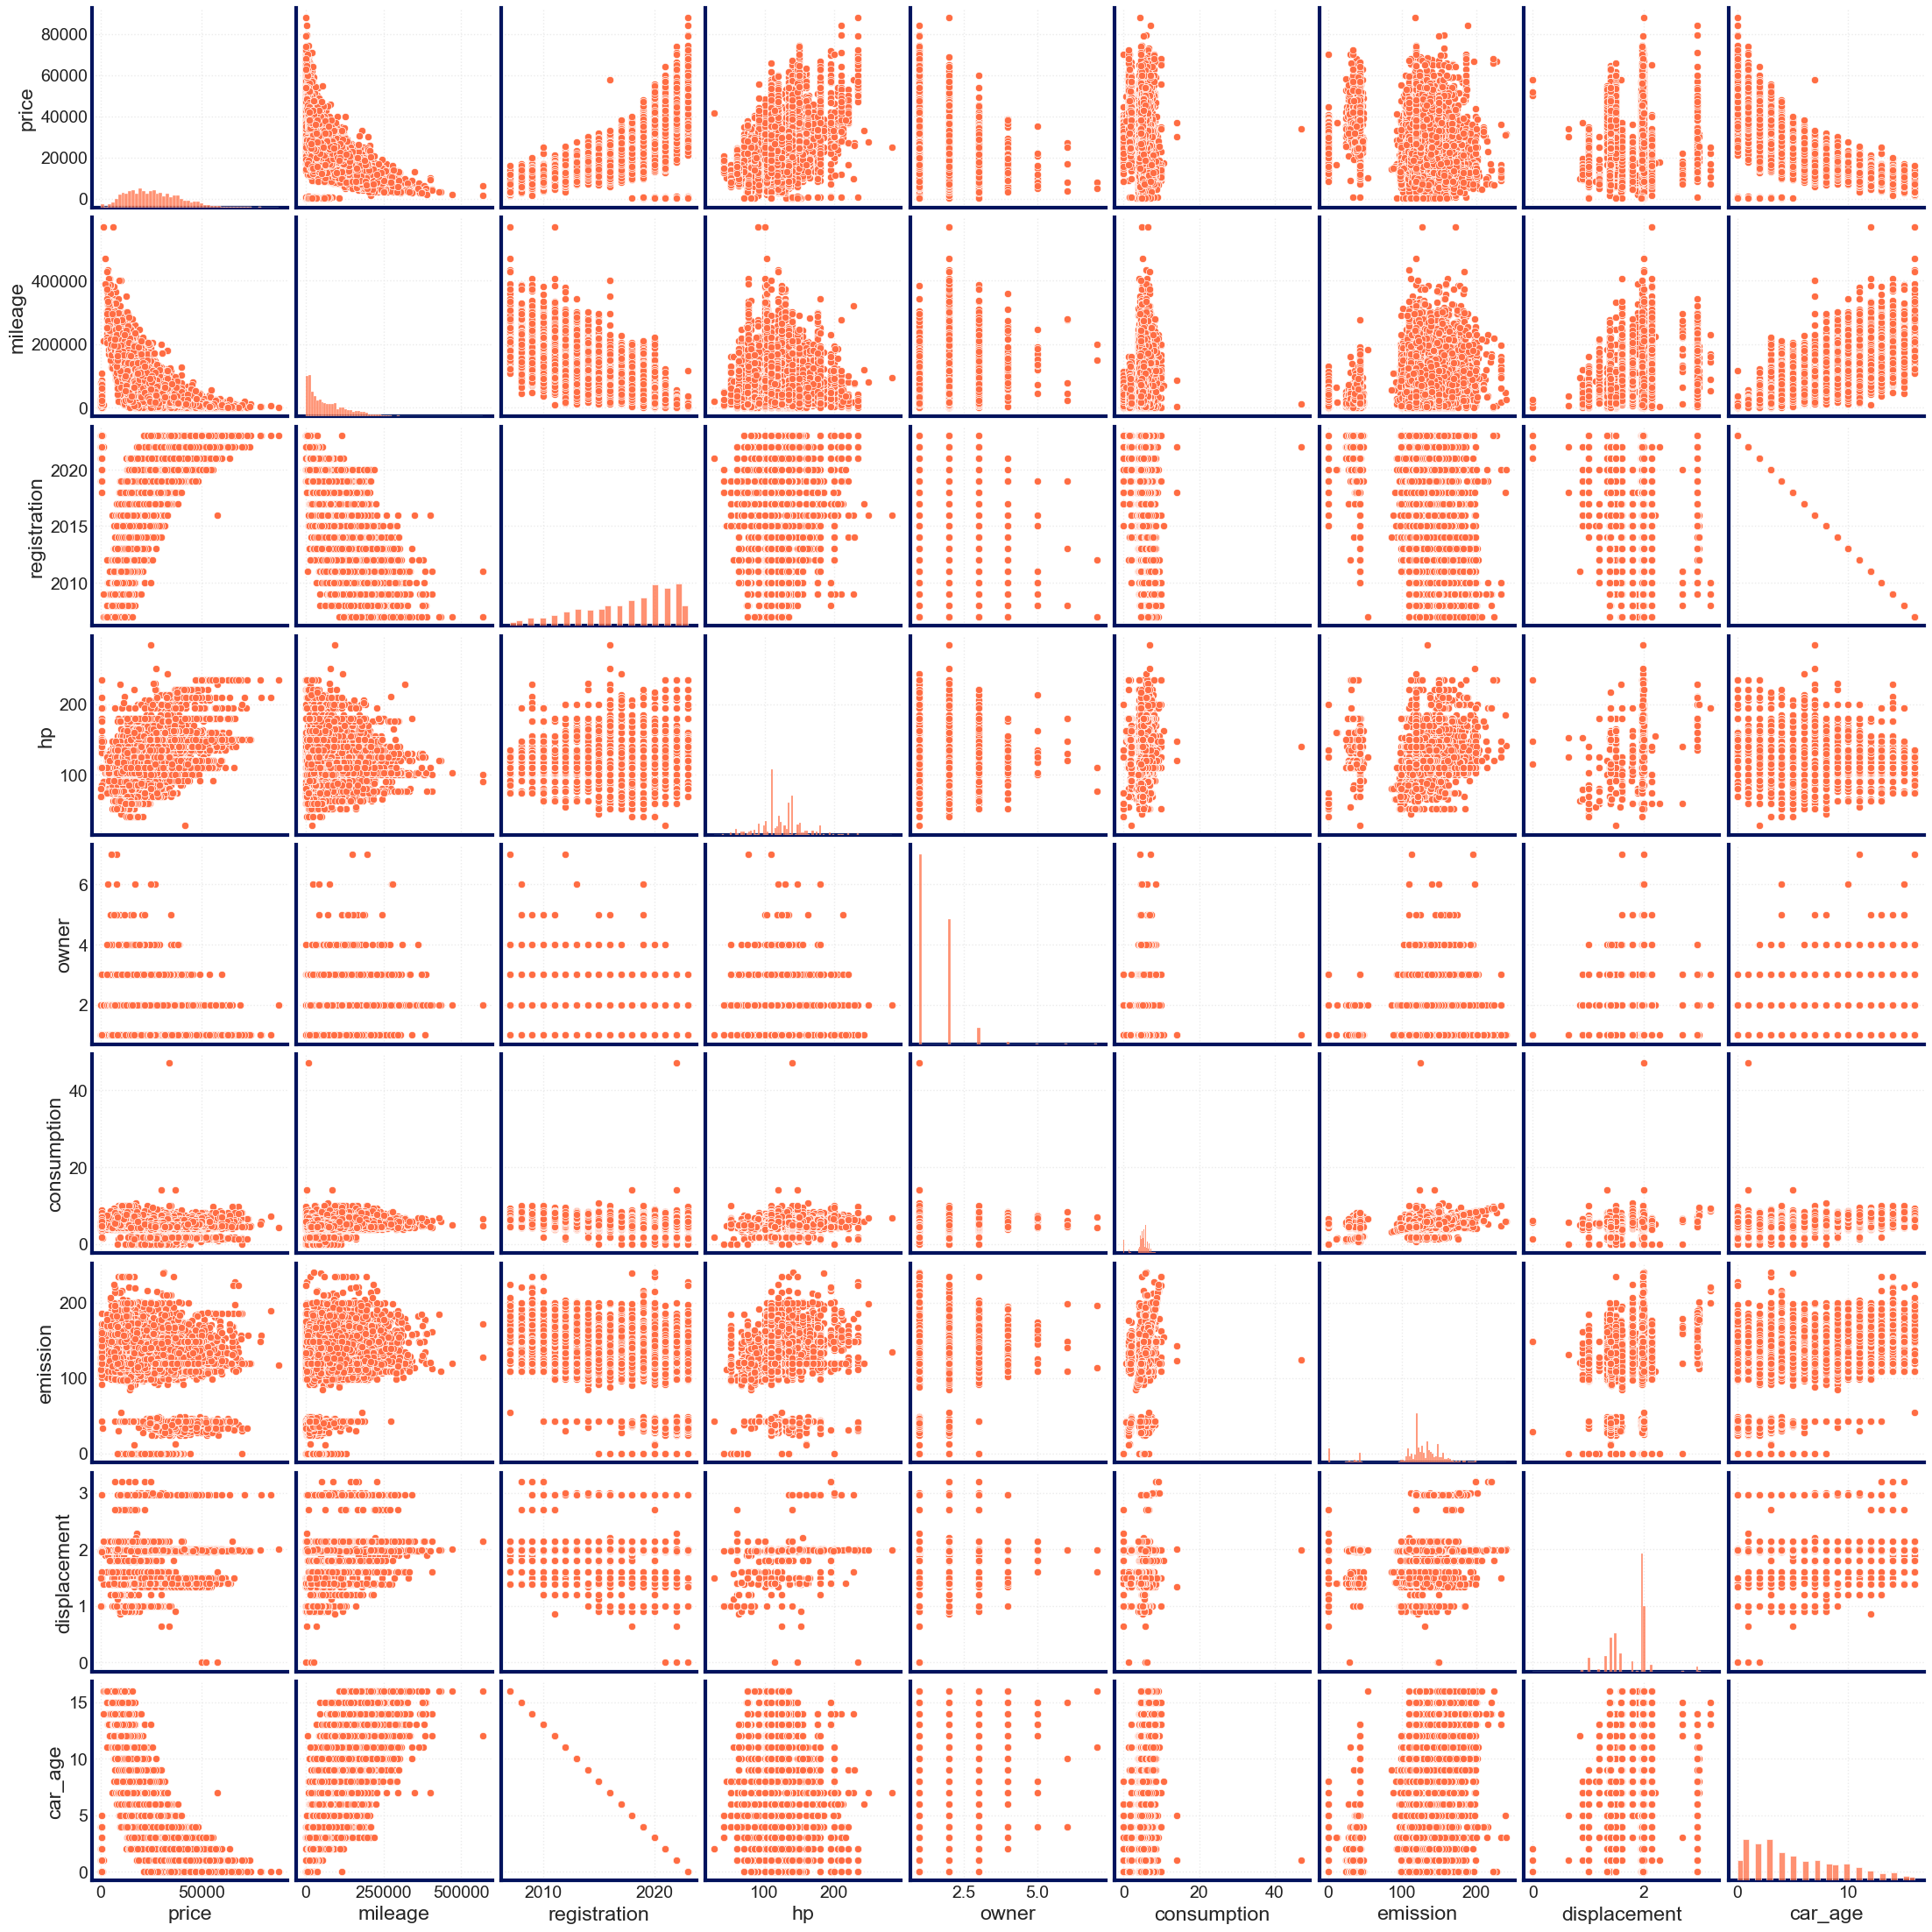

In [40]:
sns.pairplot(german);

# Barplot

### barplot the oldest car uk

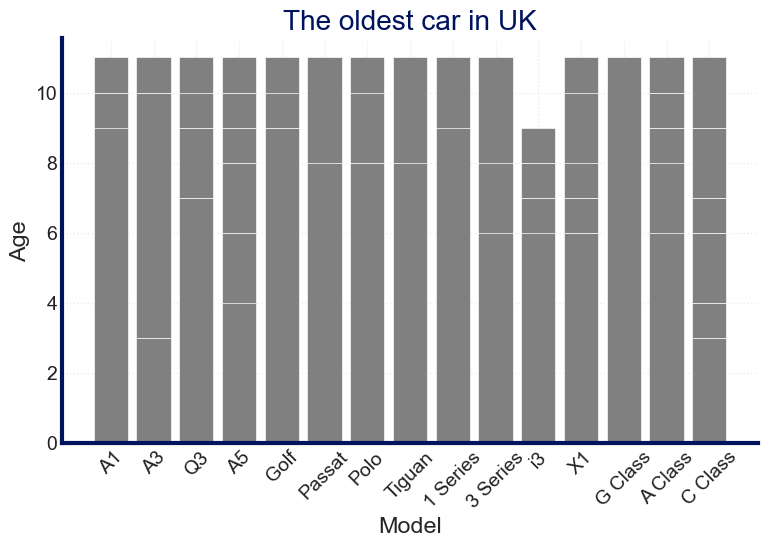

In [41]:
# color defination
colors = ["grey"] * len(df)  # alle grey
oldest_car = df["car_age"].idxmax()  # Index the oldest car
colors[oldest_car] = "blue"  # index the oldest car


plt.bar(df["model"], df["car_age"], color=colors)
plt.title("The oldest car in UK")
plt.xlabel("Model")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.show()

### barplot the oldest car german

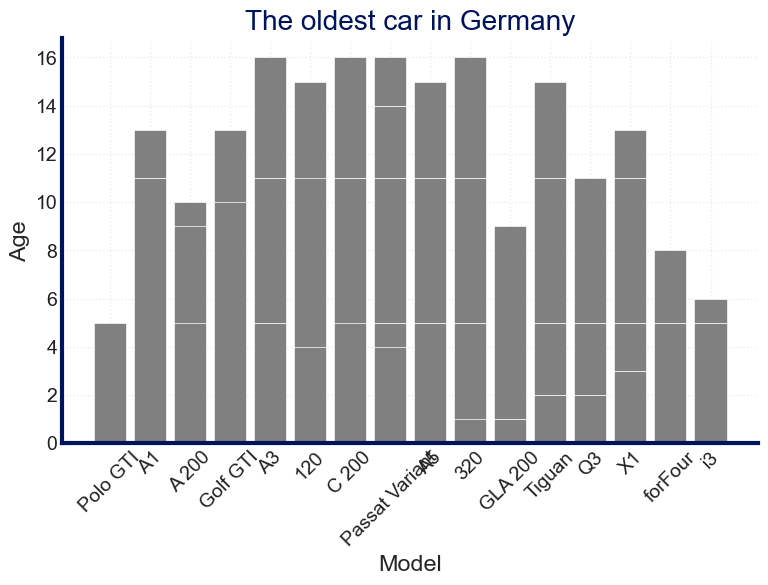

In [42]:
# color defination
colors = ["grey"] * len(df)  # alle grey
oldest_car = german["car_age"].idxmax()  # Index the oldest car
colors[oldest_car] = "blue"  # index the oldest car


plt.bar(german["model"], german["car_age"], color=colors)
plt.title("The oldest car in Germany")
plt.xlabel("Model")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.show()

### barplot model and price, uk

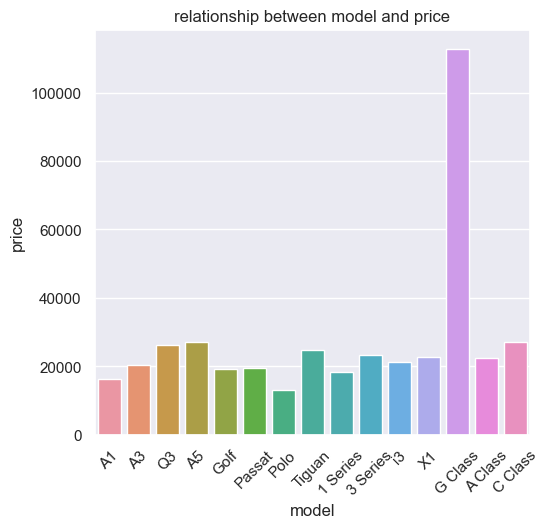

In [43]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'model',y = 'price',data = df, ci= None)
plt.title('relationship between model and price')
plt.xticks(rotation=45);

### barplot price and model, german

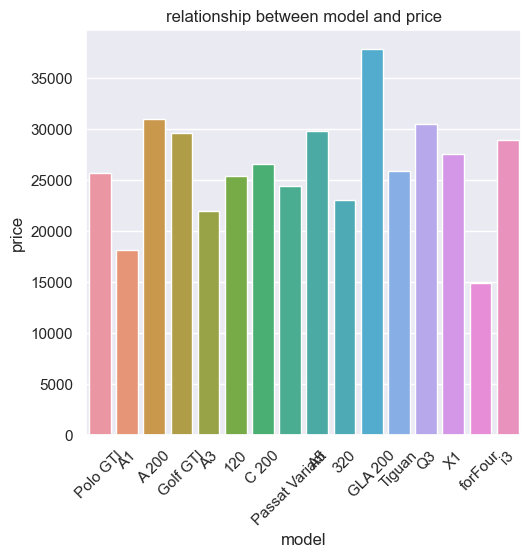

In [44]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'model',y = 'price',data = german, ci= None)
plt.title('relationship between model and price')
plt.xticks(rotation=45);

### barplot price and class, uk

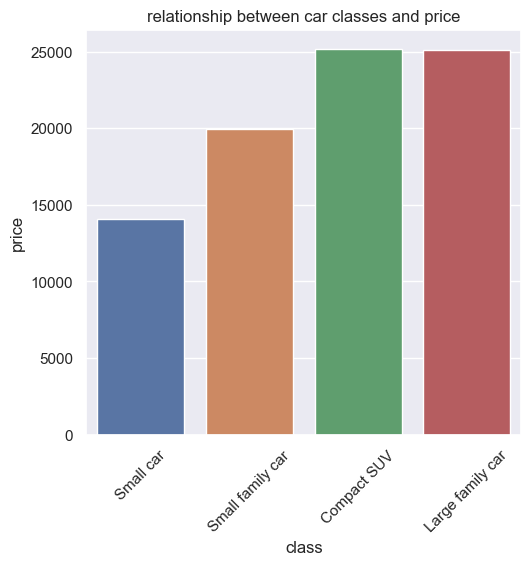

In [45]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'class',y = 'price',data = df, ci= None)
plt.title('relationship between car classes and price')
plt.xticks(rotation=45);

### barplot price and class, german

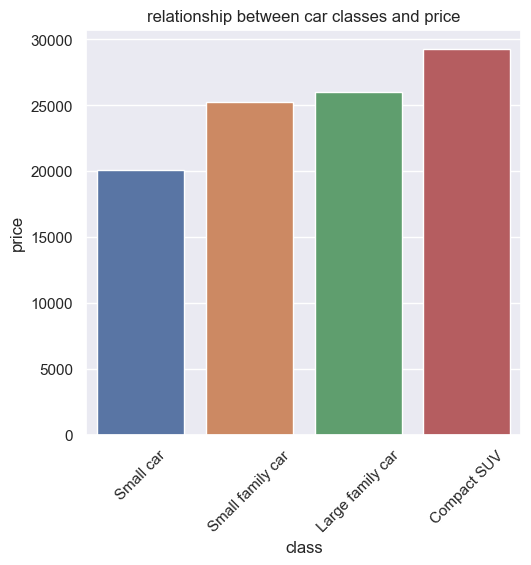

In [46]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'class',y = 'price',data = german, ci= None)
plt.title('relationship between car classes and price')
plt.xticks(rotation=45);

### two plots together, class vs.price

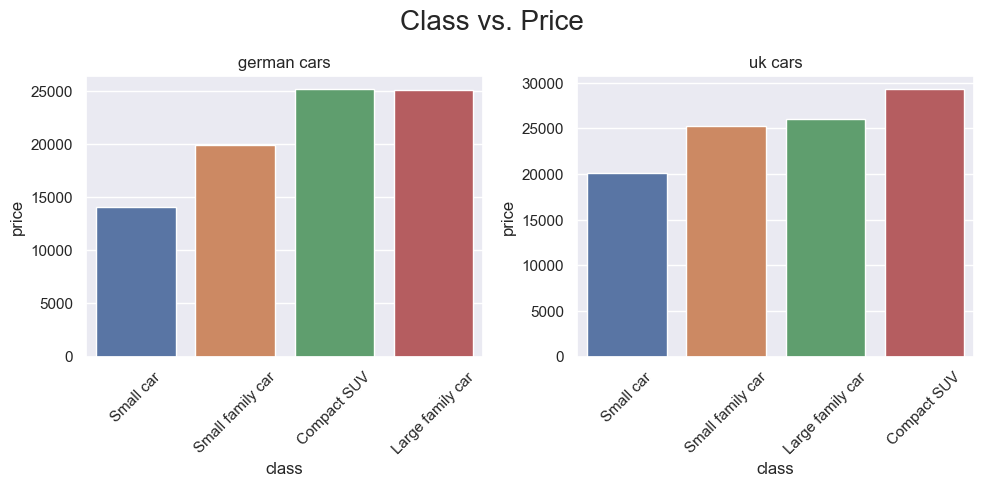

In [47]:
plt.figure(figsize=(10,8))
plt.suptitle('Class vs. Price', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(x = 'class',y = 'price',data = df, ci= None);
plt.title('german cars')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)  
sns.barplot(x = 'class',y = 'price',data = german, ci= None);
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.xticks(rotation=45);

### the count of the model, uk

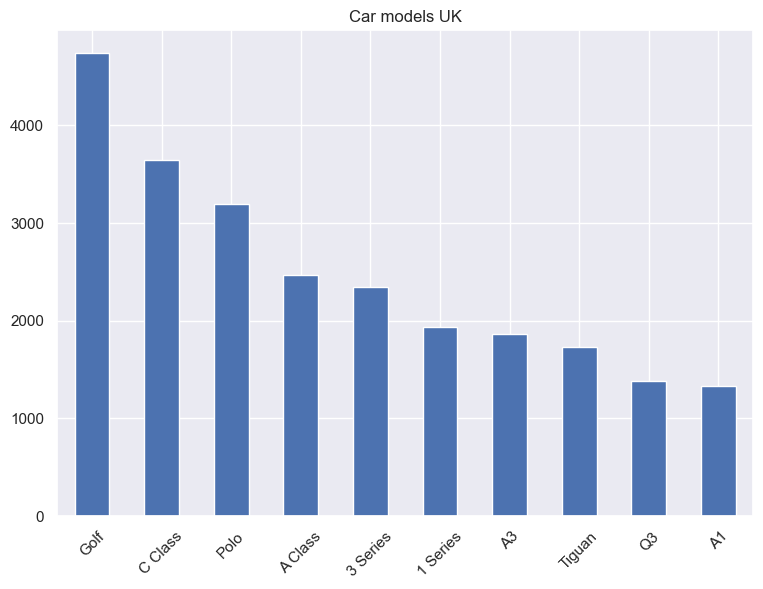

In [48]:
L = df['model'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Car models UK')
plt.xticks(rotation=45);

### the counting of model, german

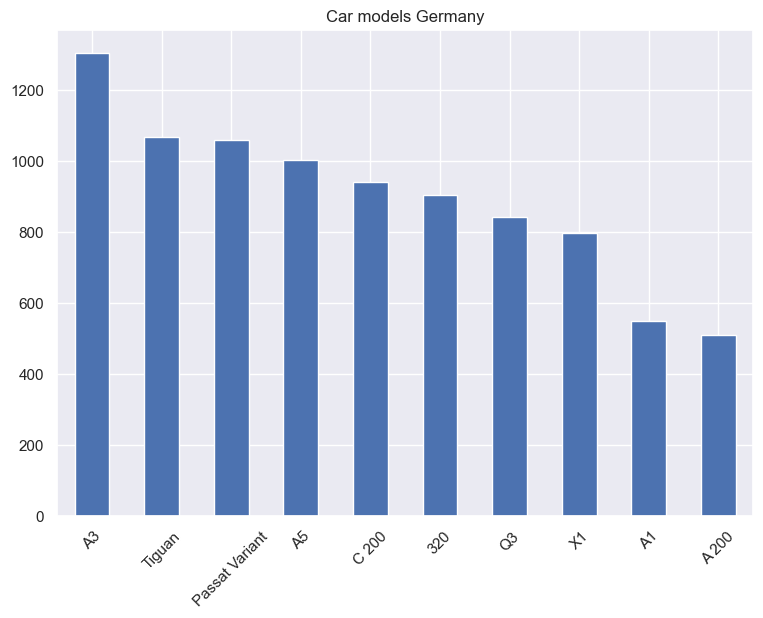

In [49]:
L = german['model'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Car models Germany')
plt.xticks(rotation=45);

### the counting of age, uk

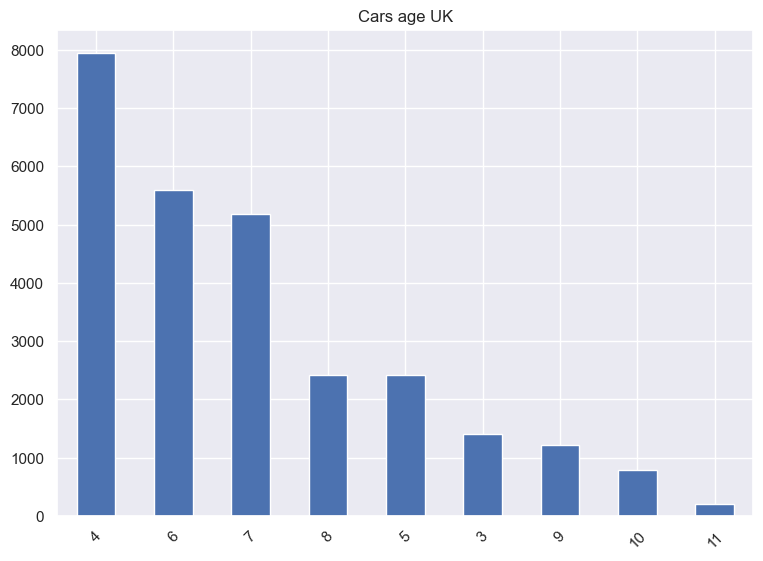

In [50]:
L = df['car_age'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Cars age UK')
plt.xticks(rotation=45);

### the counting of age, german

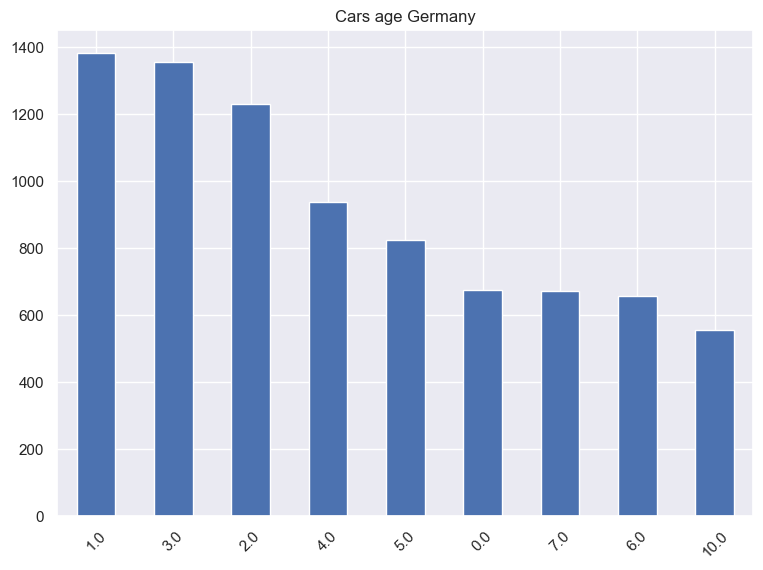

In [51]:
L = german['car_age'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Cars age Germany')
plt.xticks(rotation=45);

### groupby make, class, model UK

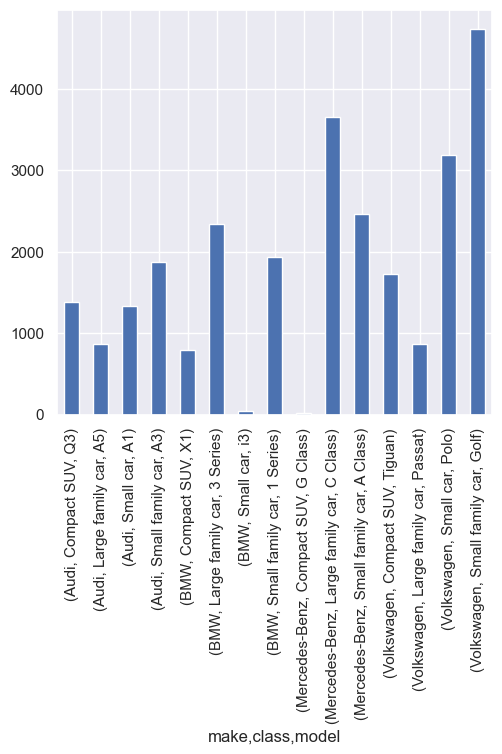

In [52]:
df.groupby(['make', 'class', 'model']).count()['price'].plot(kind='bar');

### groupby make, class, model German

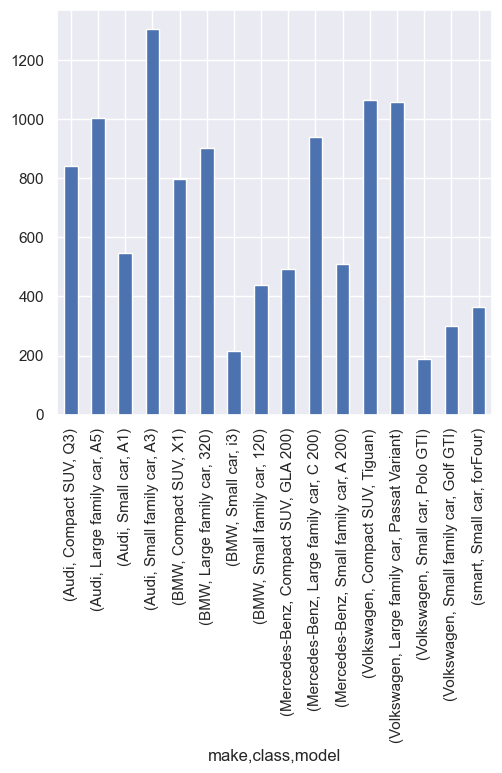

In [53]:
german.groupby(['make', 'class', 'model']).count()['price'].plot(kind='bar');

### Volkswagen UK

In [54]:
df_v = df[df['make'] == 'Volkswagen']

Text(0.5, 1.0, 'Volkswagen average car price/per class')

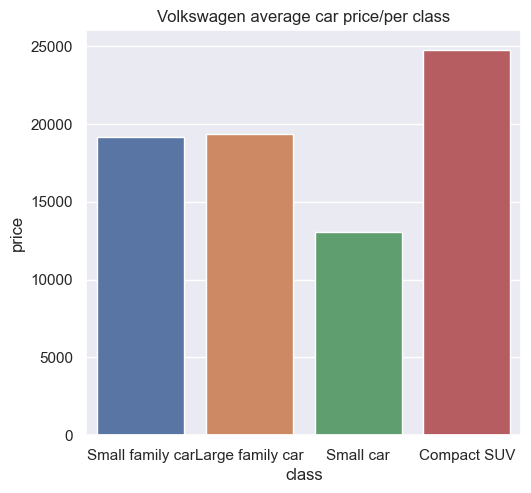

In [55]:
sns.barplot(data =df_v, x='class', y='price',ci= None)
plt.title('Volkswagen average car price/per class')

### Volkswagen German

In [56]:
df_v = df[df['make'] == 'Volkswagen']

Text(0.5, 1.0, 'Volkswagen average car price/per class')

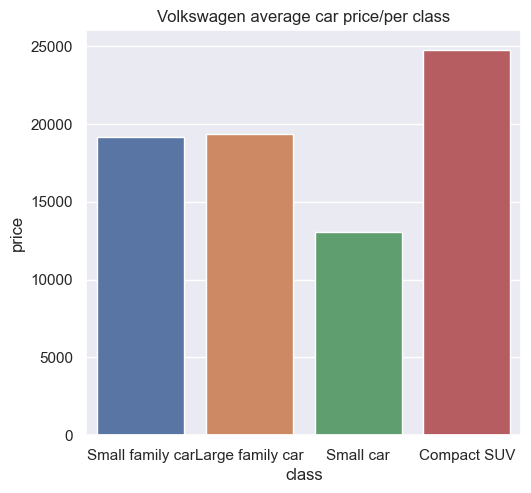

In [57]:
sns.barplot(data =df_v, x='class', y='price',ci= None)
plt.title('Volkswagen average car price/per class')

### ??? It should be plot for two feature. No working yet...

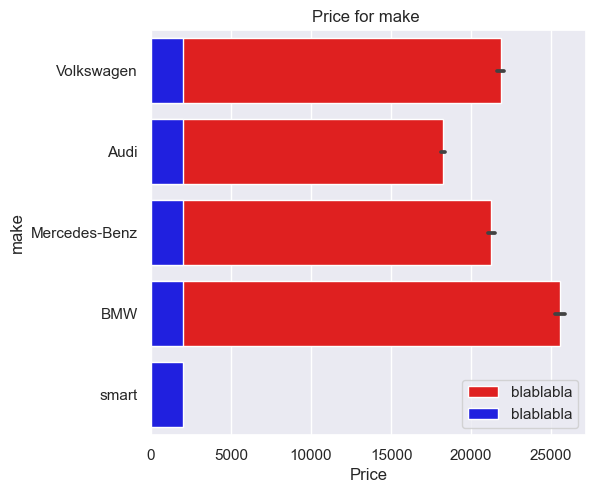

In [58]:
g = sns.barplot(y='make', x='price', data=df, color='red', label='blablabla')
g = sns.barplot(y='make', x='registration', data=german, color='blue', label='blablabla')
plt.title("Price for make ", size=12)
plt.xlabel('Price')
plt.legend()
plt.show()

# Hextagram

### hexbin age and price uk

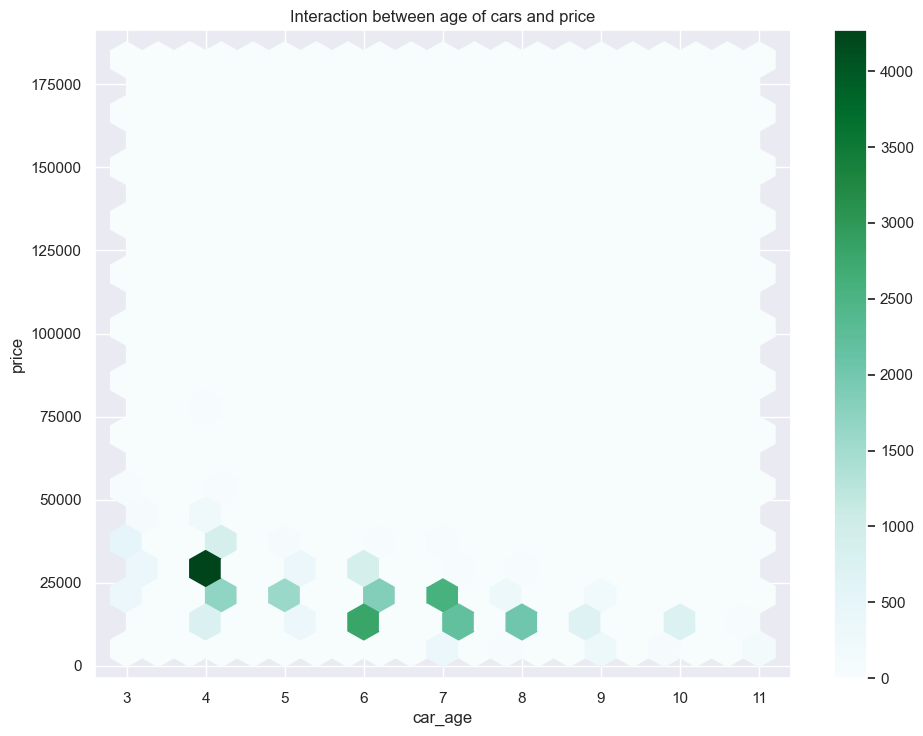

In [59]:
df.plot.hexbin(x='car_age', y='price', gridsize=20, figsize=(10,8))
plt.title('Interaction between age of cars and price');

### hexbin age and price, german

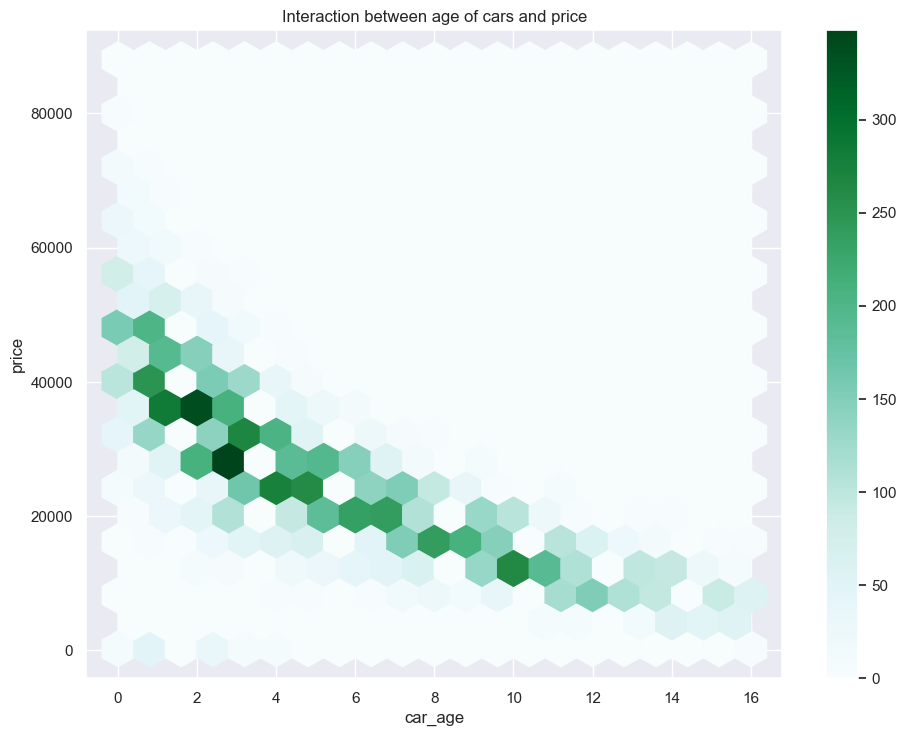

In [60]:
german.plot.hexbin(x='car_age', y='price', gridsize=20, figsize=(10,8))
plt.title('Interaction between age of cars and price');

# Correlation matrix 

### uk cars

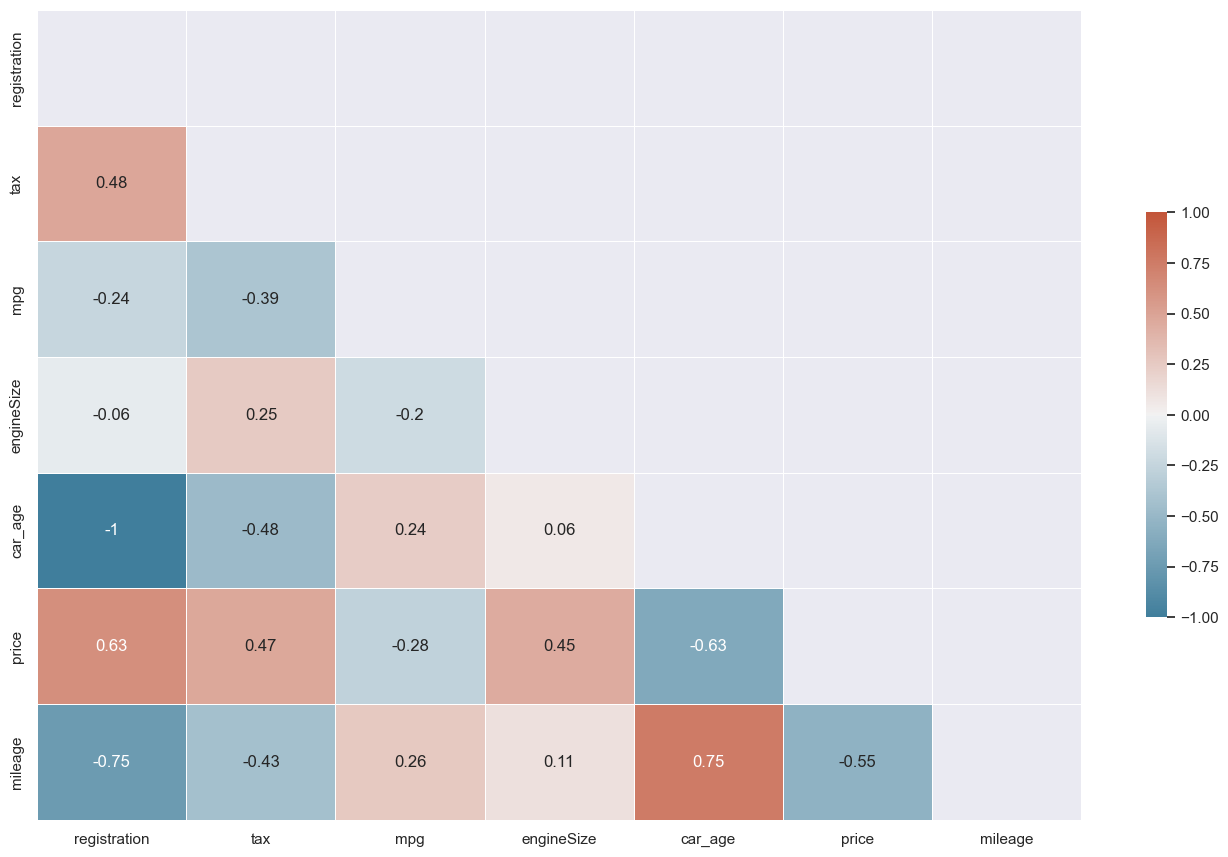

In [61]:
# Compute the correlation matrix
corr = df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5});

### german cars

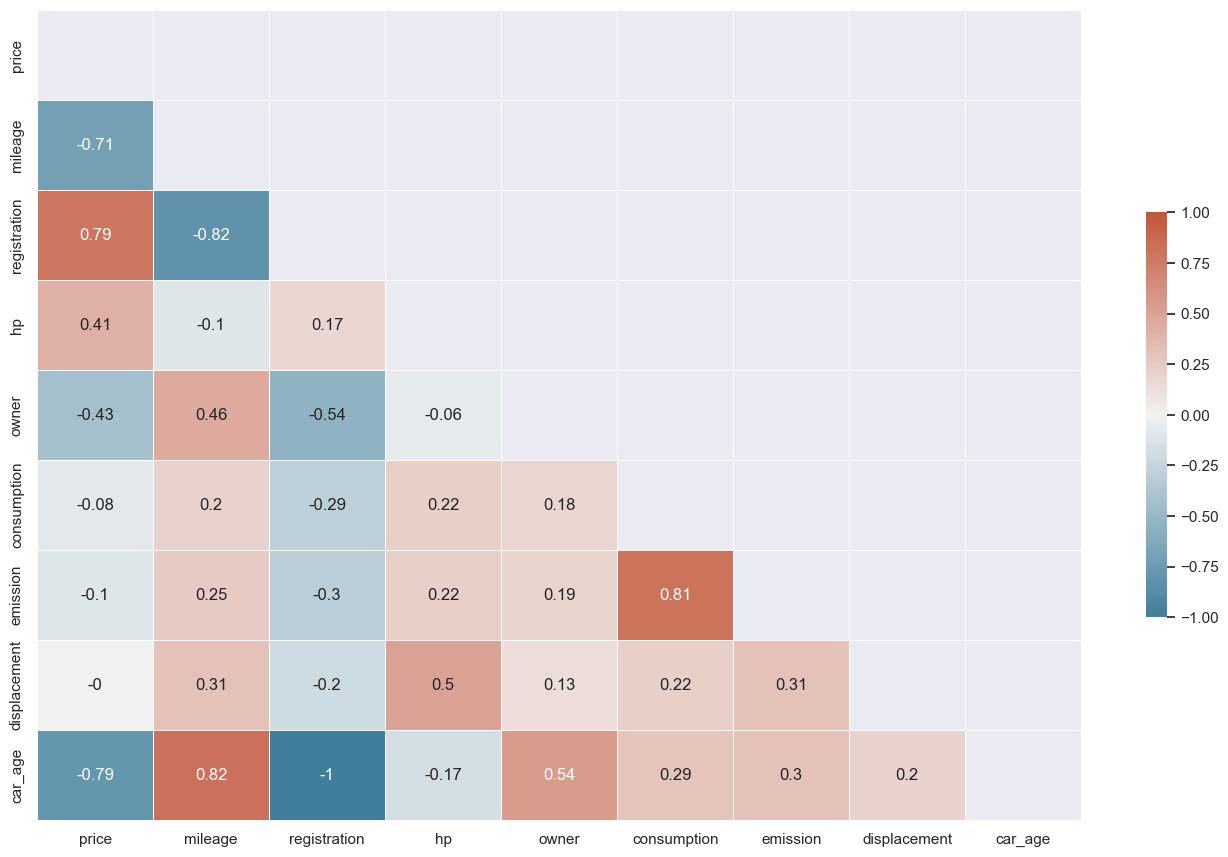

In [62]:
# Compute the correlation matrix
corr = german.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5});

# Relplot price and age, uk

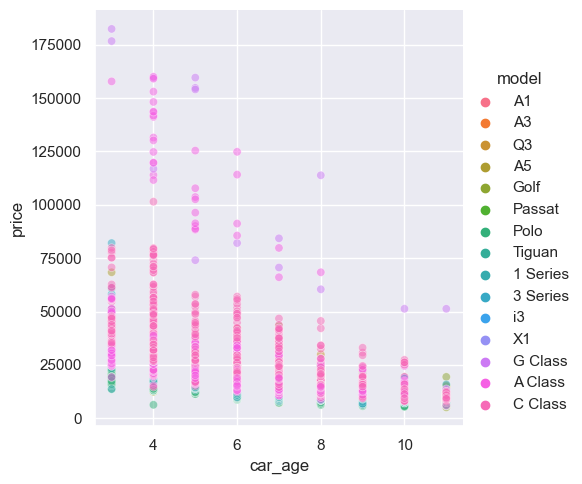

In [63]:
sns.relplot(y=df['price'], x=df['car_age'], hue=df['model'], alpha=0.5);

### relplot price and age, german

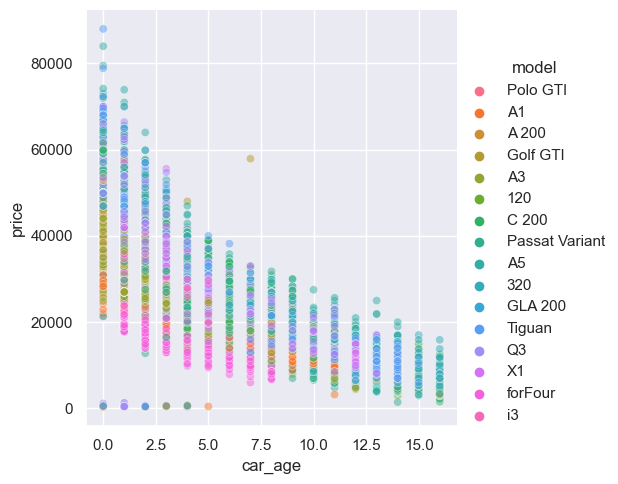

In [64]:
sns.relplot(y=german['price'], x=german['car_age'], hue=german['model'], alpha=0.5);

In [65]:
df.groupby(['class', 'model']).count()['price']

class             model   
Compact SUV       G Class       15
                  Q3          1378
                  Tiguan      1729
                  X1           789
Large family car  3 Series    2345
                  A5           861
                  C Class     3648
                  Passat       862
Small car         A1          1331
                  Polo        3191
                  i3            43
Small family car  1 Series    1931
                  A Class     2463
                  A3          1868
                  Golf        4734
Name: price, dtype: int64

# Heatmap

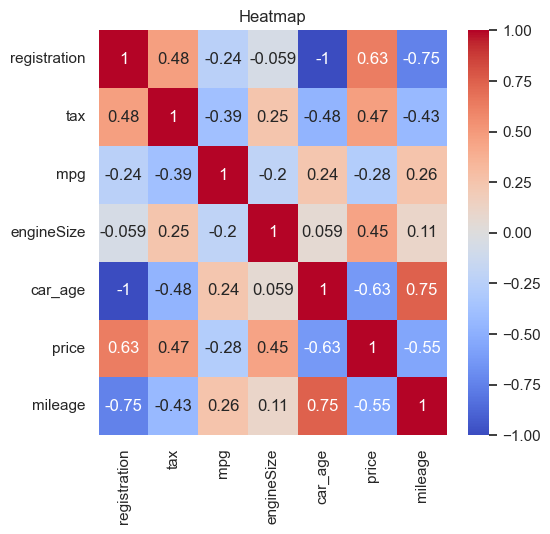

In [66]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap")
plt.show()

### two barplots together

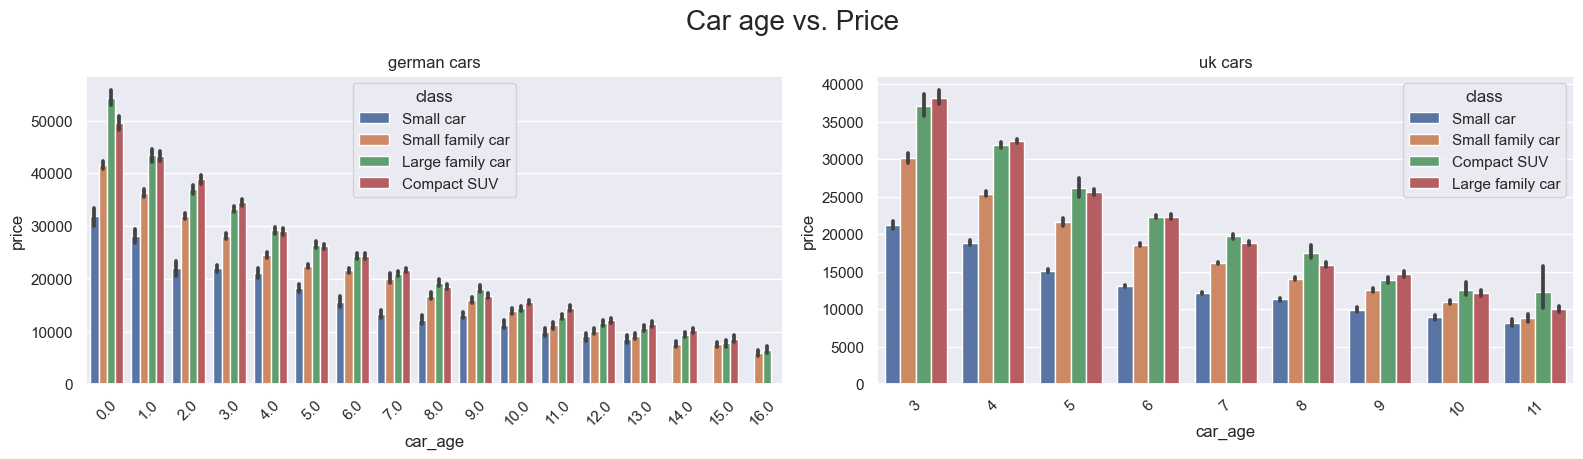

In [67]:
plt.figure(figsize=(16,8))
plt.suptitle('Car age vs. Price', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(x="car_age", y="price",  data=german, hue="class");
plt.title('german cars')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)  
sns.barplot(x="car_age", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.xticks(rotation=45);

# The lost of price, uk

### groupby cars, uk

In [68]:
df_grouped = df.groupby(['make', 'car','car_age', 'registration']).mean()['price'].round(2).reset_index()
df_grouped['loss'] = df_grouped['price']

In [69]:
#calculating max price of each car model and assigning it to a data-frame

max_price = df_grouped.groupby(['make','car']).max()['price'].reset_index()
max_price

make                    car     price
0            Audi                Audi A1  26012.86
1            Audi                Audi A3  29955.44
2            Audi                Audi A5  36276.08
3            Audi                Audi Q3  37632.39
4             BMW           BMW 1 Series  31406.80
5             BMW           BMW 3 Series  38944.97
6             BMW                 BMW X1  34192.48
7             BMW                 BMW i3  23287.78
8   Mercedes-Benz  Mercedes-Benz A Class  32087.15
9   Mercedes-Benz  Mercedes-Benz C Class  42468.70
10  Mercedes-Benz  Mercedes-Benz G Class 179548.29
11     Volkswagen        Volkswagen Golf  28465.39
12     Volkswagen      Volkswagen Passat  31631.44
13     Volkswagen        Volkswagen Polo  18450.30
14     Volkswagen      Volkswagen Tiguan  34690.86

In [70]:
max_price.rename(columns={"price": "new_price"}, inplace=True)

In [71]:
#merging both the dataframes
df_grouped_1 = pd.merge(df_grouped, max_price,  how='left', left_on=['make', 'car'], right_on = ['make', 'car'])
df_grouped_1

make                car  car_age  registration    price     loss  \
0          Audi            Audi A1        3          2020 26012.86 26012.86   
1          Audi            Audi A1        4          2019 24173.86 24173.86   
2          Audi            Audi A1        5          2018 17634.80 17634.80   
3          Audi            Audi A1        6          2017 15327.67 15327.67   
4          Audi            Audi A1        7          2016 13946.59 13946.59   
..          ...                ...      ...           ...      ...      ...   
124  Volkswagen  Volkswagen Tiguan        7          2016 18894.55 18894.55   
125  Volkswagen  Volkswagen Tiguan        8          2015 14979.68 14979.68   
126  Volkswagen  Volkswagen Tiguan        9          2014 12910.71 12910.71   
127  Volkswagen  Volkswagen Tiguan       10          2013 11960.69 11960.69   
128  Volkswagen  Volkswagen Tiguan       11          2012 10504.99 10504.99   

     new_price  
0     26012.86  
1     26012.86  
2     26012.86  
3     26012.86  
4     26012.86  
..         ...  
124   34690.86  
125   34690.86  
126   34690.86  
127   34690.86  
128   34690.86  

[129 rows x 7 columns]

In [72]:
df_grouped_1.groupby(['make', 'car']).count()['price']

make           car                  
Audi           Audi A1                  9
               Audi A3                  9
               Audi A5                  9
               Audi Q3                  9
BMW            BMW 1 Series             9
               BMW 3 Series             9
               BMW X1                   9
               BMW i3                   4
Mercedes-Benz  Mercedes-Benz A Class    9
               Mercedes-Benz C Class    9
               Mercedes-Benz G Class    8
Volkswagen     Volkswagen Golf          9
               Volkswagen Passat        9
               Volkswagen Polo          9
               Volkswagen Tiguan        9
Name: price, dtype: int64

In [73]:
#df_grouped_1['loss'] = df_grouped_1['price_y']-df_grouped_1['price_x']
df_grouped_1

make                car  car_age  registration    price     loss  \
0          Audi            Audi A1        3          2020 26012.86 26012.86   
1          Audi            Audi A1        4          2019 24173.86 24173.86   
2          Audi            Audi A1        5          2018 17634.80 17634.80   
3          Audi            Audi A1        6          2017 15327.67 15327.67   
4          Audi            Audi A1        7          2016 13946.59 13946.59   
..          ...                ...      ...           ...      ...      ...   
124  Volkswagen  Volkswagen Tiguan        7          2016 18894.55 18894.55   
125  Volkswagen  Volkswagen Tiguan        8          2015 14979.68 14979.68   
126  Volkswagen  Volkswagen Tiguan        9          2014 12910.71 12910.71   
127  Volkswagen  Volkswagen Tiguan       10          2013 11960.69 11960.69   
128  Volkswagen  Volkswagen Tiguan       11          2012 10504.99 10504.99   

     new_price  
0     26012.86  
1     26012.86  
2     26012.86  
3     26012.86  
4     26012.86  
..         ...  
124   34690.86  
125   34690.86  
126   34690.86  
127   34690.86  
128   34690.86  

[129 rows x 7 columns]

In [74]:
df_grouped_1['loss%'] = (df_grouped_1[['price','new_price']].pct_change(axis=1)['new_price']*100).round(2)

#df_grouped_1.eval('loss = new_price - price', inplace = True)
df_grouped_1.head()

make      car  car_age  registration    price     loss  new_price  loss%
0  Audi  Audi A1        3          2020 26012.86 26012.86   26012.86   0.00
1  Audi  Audi A1        4          2019 24173.86 24173.86   26012.86   7.61
2  Audi  Audi A1        5          2018 17634.80 17634.80   26012.86  47.51
3  Audi  Audi A1        6          2017 15327.67 15327.67   26012.86  69.71
4  Audi  Audi A1        7          2016 13946.59 13946.59   26012.86  86.52

### price loss in cars in last 10 years, uk

Text(0.5, 1.0, ' Average price loss in cars in last 10 years')

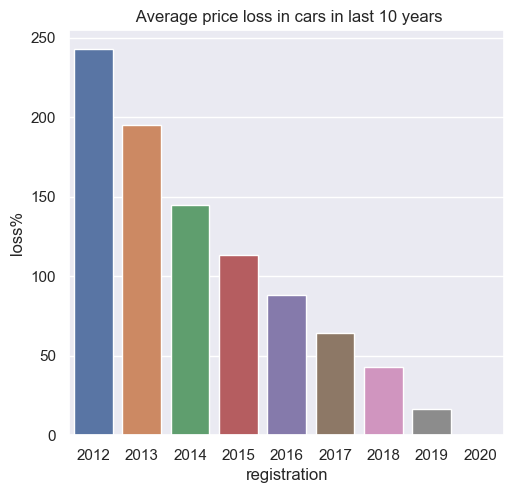

In [75]:
sns.barplot(data=df_grouped_1,x='registration',y='loss%',ci=None)
plt.title(' Average price loss in cars in last 10 years')

### spliting the cars with registration

In [76]:
def split_all_cars(df, car):
    return df_grouped[df_grouped['car'] == car].sort_values(['registration'], ascending = False)

In [77]:
cars_name = ['Audi Q3', 'BMW X1', 'Mercedes-Benz G Series', 'Volkswagen Tiguan',
       'Audi A5', 'BMW 3 Series', 'Mercedes-Benz C Series',
       'Volkswagen Passat', 'Audi A1', 'BMW i3',
       'Volkswagen Polo', 'Audi A3', 'BMW 1 Series',
       'Mercedes-Benz A Series', 'Volkswagen Golf']
dfs = {car: split_all_cars(df, car) for car in cars_name}

In [78]:
for key, data in dfs.items():
   
    data['loss'] =((1- data['loss']/data['price'].max())*100).round(2)

In [79]:
df_loss = pd.concat(dfs.values(), ignore_index=True)
df_loss.head()

make      car  car_age  registration    price  loss
0  Audi  Audi Q3        3          2020 37632.39  0.00
1  Audi  Audi Q3        4          2019 34058.91  9.50
2  Audi  Audi Q3        5          2018 26493.80 29.60
3  Audi  Audi Q3        6          2017 22379.65 40.53
4  Audi  Audi Q3        7          2016 19966.91 46.94

In [80]:
df_volkswagen = df_loss.query('make =="Volkswagen"')

In [81]:
df_Audi = df_loss.query('make =="Audi"')

In [82]:
df_BMW = df_loss.query('make =="BMW"')

# Why I don't see the data for Mercedes?

In [83]:
df_Mercedez = df_loss.query('make == "Mercedes-Benz"')
df_Mercedez

Empty DataFrame
Columns: [make, car, car_age, registration, price, loss]
Index: []

### price loss per make in last 10 years, uk

ValueError: min() arg is an empty sequence

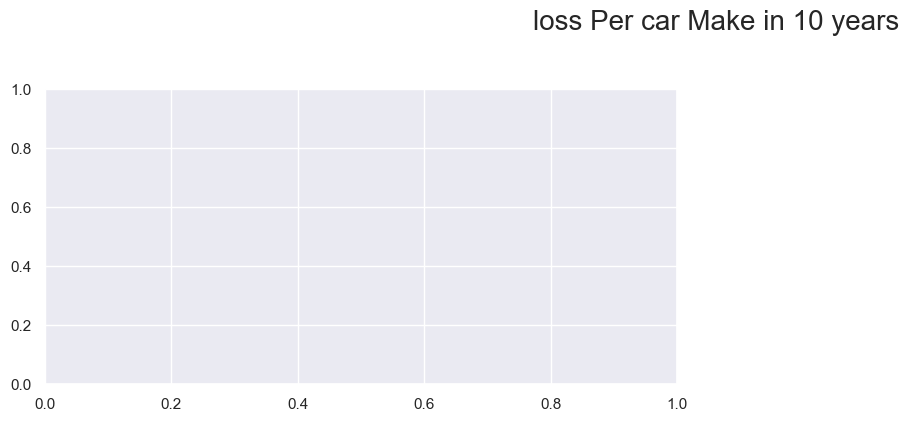

In [84]:
plt.figure(figsize=(16,8))
plt.suptitle('loss Per car Make in 10 years', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(data = df_Mercedez, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Mercedes-benz')

plt.subplot(2, 2, 2)  
sns.barplot(data = df_volkswagen, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Volkswagen')

plt.subplot(2, 2, 3) 
sns.barplot(data = df_Audi, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Audi')

plt.subplot(2, 2, 4)
sns.barplot(data = df_BMW, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('BMW');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price loss vs. car age, uk

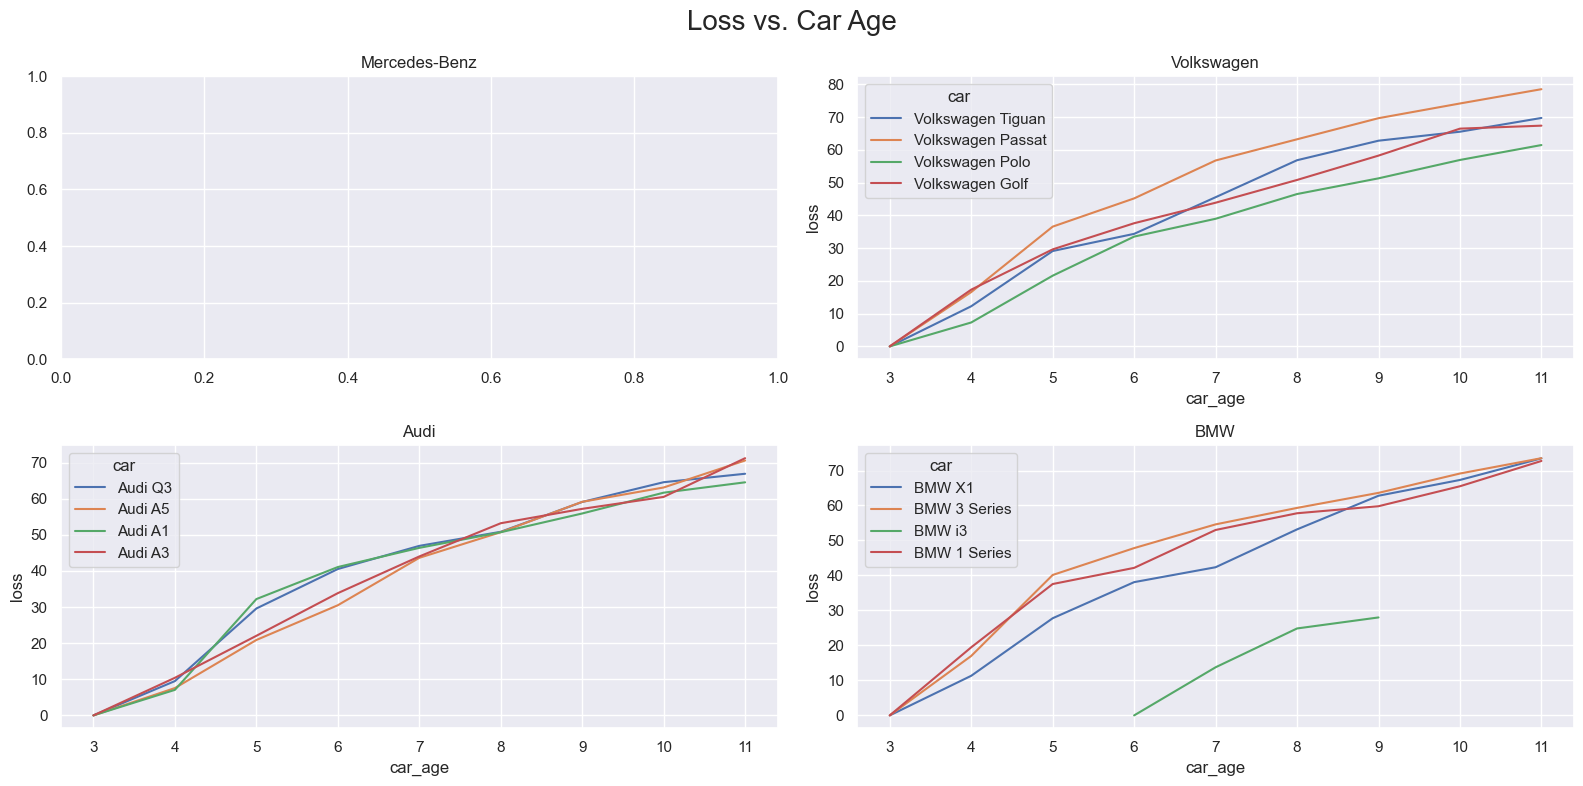

In [85]:
plt.figure(figsize=(16,8))
plt.suptitle('Loss vs. Car Age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(data = df_Mercedez, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Mercedes-Benz')

plt.subplot(2, 2, 2)  
sns.lineplot(data = df_volkswagen, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Volkswagen')

plt.subplot(2, 2, 3) 
sns.lineplot(data = df_Audi, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Audi')

plt.subplot(2, 2, 4)
sns.lineplot(data = df_BMW, x = 'car_age', y= 'loss', hue= 'car');
plt.title('BMW');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

In [86]:
df_loss.columns

Index(['make', 'car', 'car_age', 'registration', 'price', 'loss'], dtype='object')

### price loss by car model, uk

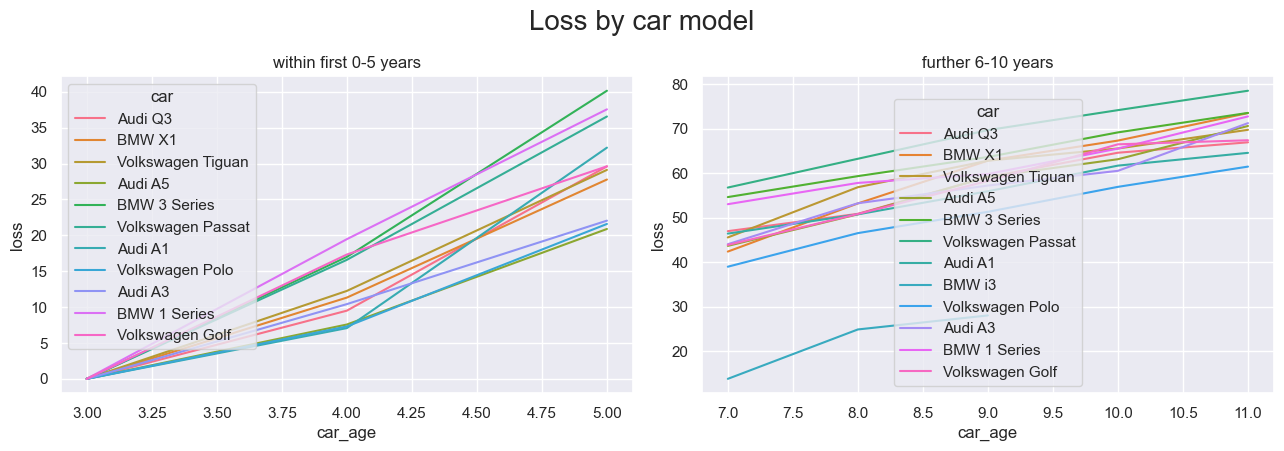

In [87]:
plt.figure(figsize=(13,8))
plt.suptitle('Loss by car model', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="loss",  data=df_loss.query('car_age <6'), hue="car");
plt.title('within first 0-5 years')

plt.subplot(2, 2, 2)  
sns.lineplot(x="car_age", y="loss",  data=df_loss.query('car_age >6'), hue="car");
plt.title('further 6-10 years')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

# The lost of price, german

### group cars

In [88]:
# german


In [89]:
german_grouped = german.groupby(['make', 'car','car_age', 'registration']).mean()['price'].round(2).reset_index()
german_grouped['loss'] = german_grouped['price']

In [90]:
#calculating max price of each car model and assigning it to a data-frame

max_price = german_grouped.groupby(['make','car']).max()['price'].reset_index()
max_price

make                        car    price
0            Audi                    Audi A1 30269.49
1            Audi                    Audi A3 38096.37
2            Audi                    Audi A5 59202.76
3            Audi                    Audi Q3 46505.69
4             BMW                    BMW 120 44634.50
5             BMW                    BMW 320 52084.46
6             BMW                     BMW X1 51224.57
7             BMW                     BMW i3 35251.03
8   Mercedes-Benz        Mercedes-Benz A 200 43193.73
9   Mercedes-Benz        Mercedes-Benz C 200 53320.70
10  Mercedes-Benz      Mercedes-Benz GLA 200 48135.84
11     Volkswagen        Volkswagen Golf GTI 44258.90
12     Volkswagen  Volkswagen Passat Variant 50990.08
13     Volkswagen        Volkswagen Polo GTI 34670.04
14     Volkswagen          Volkswagen Tiguan 52510.27
15          smart              smart forFour 20543.77

In [91]:
max_price.rename(columns={"price": "new_price"}, inplace=True)

In [92]:
#merging both the dataframes
german_grouped_1 = pd.merge(german_grouped, max_price,  how='left', left_on=['make', 'car'], right_on = ['make', 'car'])
german_grouped_1

make            car  car_age  registration    price     loss  new_price
0     Audi        Audi A1     0.00       2023.00 30269.49 30269.49   30269.49
1     Audi        Audi A1     1.00       2022.00 26136.86 26136.86   30269.49
2     Audi        Audi A1     2.00       2021.00 20232.76 20232.76   30269.49
3     Audi        Audi A1     3.00       2020.00 23842.58 23842.58   30269.49
4     Audi        Audi A1     4.00       2019.00 22061.18 22061.18   30269.49
..     ...            ...      ...           ...      ...      ...        ...
206  smart  smart forFour     4.00       2019.00 13820.34 13820.34   20543.77
207  smart  smart forFour     5.00       2018.00 13092.44 13092.44   20543.77
208  smart  smart forFour     6.00       2017.00 12547.64 12547.64   20543.77
209  smart  smart forFour     7.00       2016.00 10967.26 10967.26   20543.77
210  smart  smart forFour     8.00       2015.00  9225.76  9225.76   20543.77

[211 rows x 7 columns]

In [93]:
german_grouped_1.groupby(['make', 'car']).count()['price']

make           car                      
Audi           Audi A1                      14
               Audi A3                      17
               Audi A5                      16
               Audi Q3                      12
BMW            BMW 120                      16
               BMW 320                      17
               BMW X1                       14
               BMW i3                        6
Mercedes-Benz  Mercedes-Benz A 200          11
               Mercedes-Benz C 200          17
               Mercedes-Benz GLA 200        10
Volkswagen     Volkswagen Golf GTI          14
               Volkswagen Passat Variant    17
               Volkswagen Polo GTI           6
               Volkswagen Tiguan            16
smart          smart forFour                 8
Name: price, dtype: int64

In [94]:
#df_grouped_1['loss'] = df_grouped_1['price_y']-df_grouped_1['price_x']
german_grouped_1

make            car  car_age  registration    price     loss  new_price
0     Audi        Audi A1     0.00       2023.00 30269.49 30269.49   30269.49
1     Audi        Audi A1     1.00       2022.00 26136.86 26136.86   30269.49
2     Audi        Audi A1     2.00       2021.00 20232.76 20232.76   30269.49
3     Audi        Audi A1     3.00       2020.00 23842.58 23842.58   30269.49
4     Audi        Audi A1     4.00       2019.00 22061.18 22061.18   30269.49
..     ...            ...      ...           ...      ...      ...        ...
206  smart  smart forFour     4.00       2019.00 13820.34 13820.34   20543.77
207  smart  smart forFour     5.00       2018.00 13092.44 13092.44   20543.77
208  smart  smart forFour     6.00       2017.00 12547.64 12547.64   20543.77
209  smart  smart forFour     7.00       2016.00 10967.26 10967.26   20543.77
210  smart  smart forFour     8.00       2015.00  9225.76  9225.76   20543.77

[211 rows x 7 columns]

In [95]:
german_grouped_1['loss%'] = (german_grouped_1[['price','new_price']].pct_change(axis=1)['new_price']*100).round(2)

#df_grouped_1.eval('loss = new_price - price', inplace = True)
german_grouped_1.head()

make      car  car_age  registration    price     loss  new_price  loss%
0  Audi  Audi A1     0.00       2023.00 30269.49 30269.49   30269.49   0.00
1  Audi  Audi A1     1.00       2022.00 26136.86 26136.86   30269.49  15.81
2  Audi  Audi A1     2.00       2021.00 20232.76 20232.76   30269.49  49.61
3  Audi  Audi A1     3.00       2020.00 23842.58 23842.58   30269.49  26.96
4  Audi  Audi A1     4.00       2019.00 22061.18 22061.18   30269.49  37.21

### price loss in cars in last 10 years, german

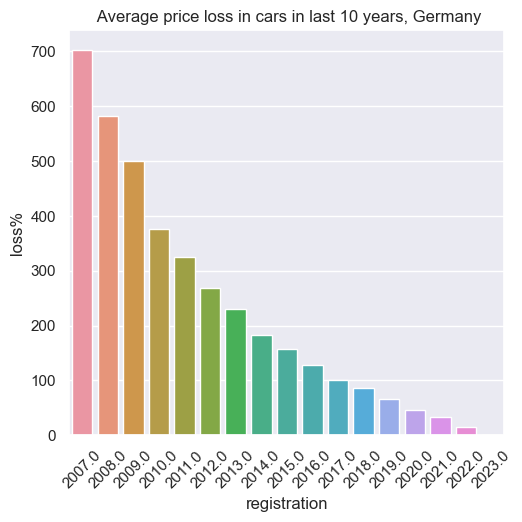

In [106]:
sns.barplot(data=german_grouped_1,x='registration',y='loss%',ci=None)
plt.title(' Average price loss in cars in last 10 years, Germany')
plt.xticks(rotation=45);

### spliting the cars with registration, german

In [97]:
def split_all_cars(df, car):
    return german_grouped[german_grouped['car'] == car].sort_values(['registration'], ascending = False)

In [107]:
cars_name = ['Audi Q3', 'BMW X1', 'Mercedes-Benz GLA 200', 'Volkswagen Tiguan',
       'Audi A5', 'BMW 320', 'Mercedes-Benz C 200',
       'Volkswagen Passat Variant', 'Audi A1', 'BMW i3',
       'Volkswagen Polo GTI', 'smart forFour', 'Audi A3', 'BMW 120',
       'Mercedes-Benz A 200', 'Volkswagen Golf GTI']
germans = {car: split_all_cars(df, car) for car in cars_name}

In [108]:
for key, data in germans.items():
   
    data['loss'] =((1- data['loss']/data['price'].max())*100).round(2)

In [109]:
german_loss = pd.concat(germans.values(), ignore_index=True)
german_loss.head()

make      car  car_age  registration    price  loss
0  Audi  Audi Q3     0.00       2023.00 46505.69  0.00
1  Audi  Audi Q3     1.00       2022.00 38732.30 16.71
2  Audi  Audi Q3     2.00       2021.00 40202.74 13.55
3  Audi  Audi Q3     3.00       2020.00 37057.65 20.32
4  Audi  Audi Q3     4.00       2019.00 32262.08 30.63

In [110]:
german_volkswagen = german_loss.query('make =="Volkswagen"')
german_Audi = german_loss.query('make =="Audi"')
german_BMW = german_loss.query('make =="BMW"')
german_Mercedez = german_loss.query('make == "Mercedes-Benz"')

### price loss per make in last 10 years, german

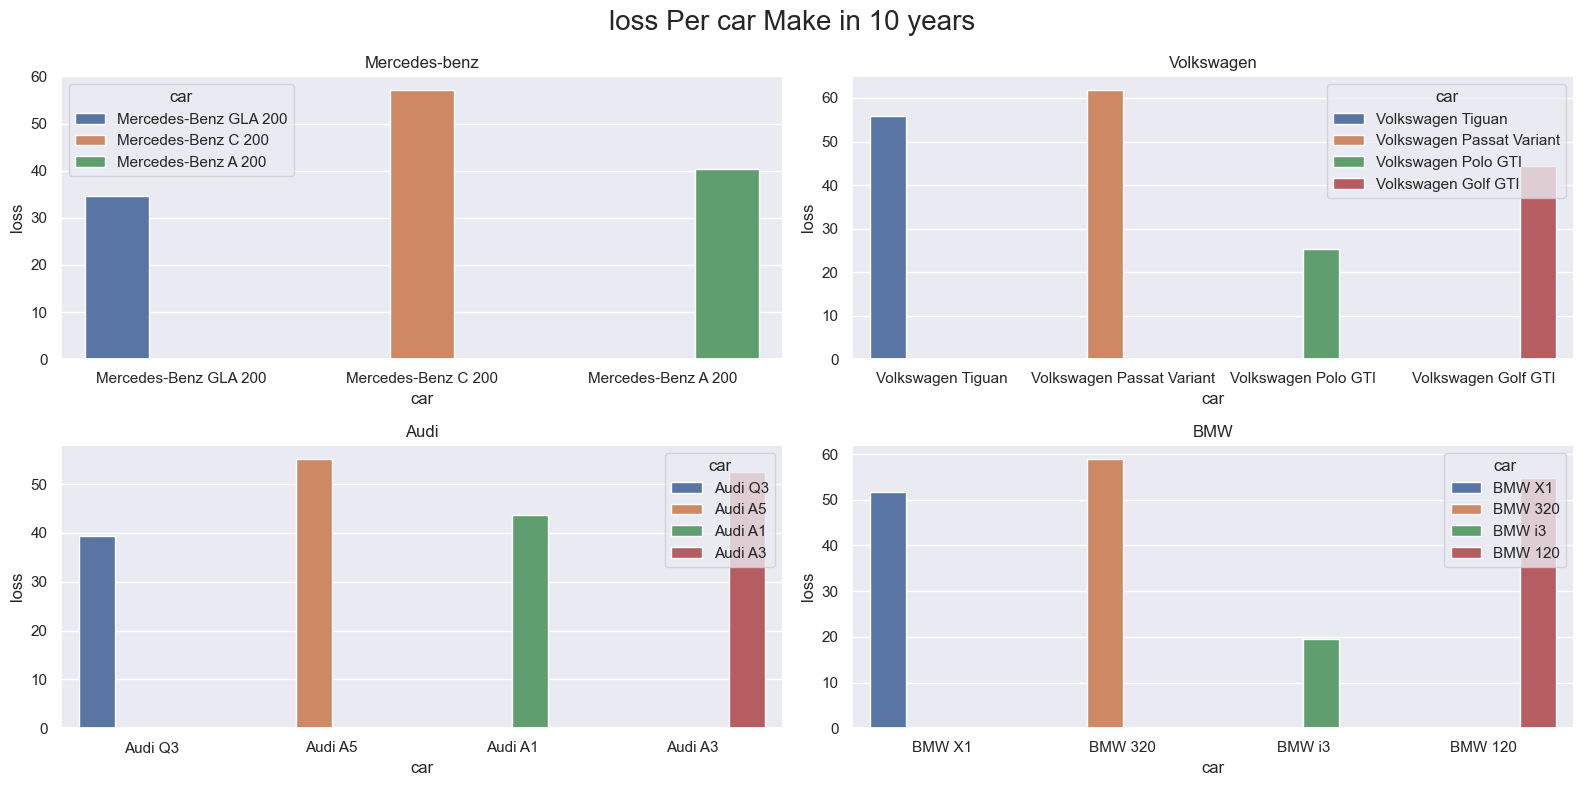

In [111]:
plt.figure(figsize=(16,8))
plt.suptitle('loss Per car Make in 10 years', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(data = german_Mercedez, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Mercedes-benz')

plt.subplot(2, 2, 2)  
sns.barplot(data = german_volkswagen, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Volkswagen')

plt.subplot(2, 2, 3) 
sns.barplot(data = german_Audi, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Audi')

plt.subplot(2, 2, 4)
sns.barplot(data = german_BMW, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('BMW');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price loss by Car Age, german

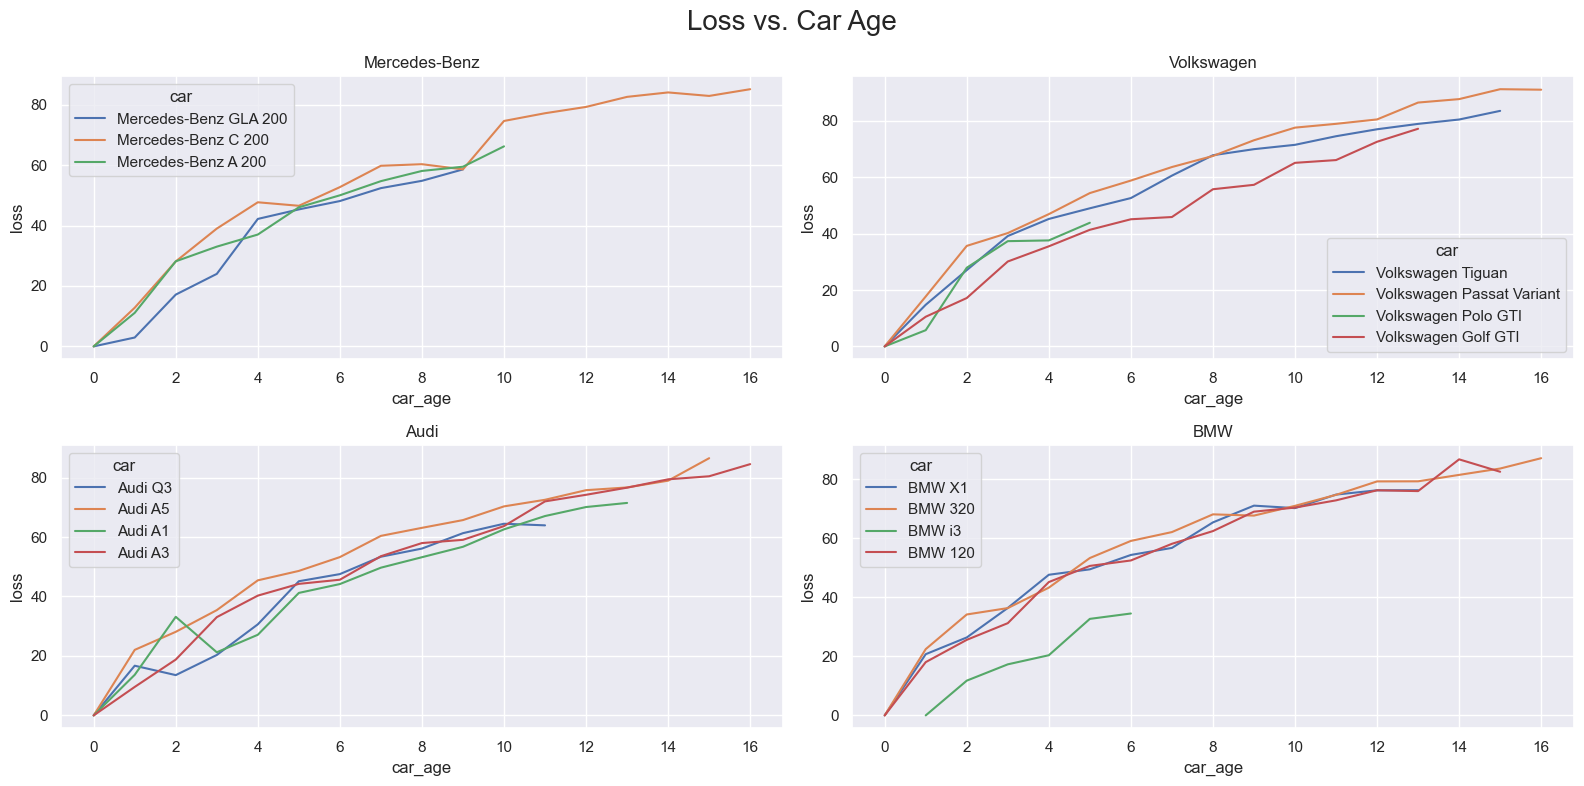

In [112]:
plt.figure(figsize=(16,8))
plt.suptitle('Loss vs. Car Age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(data = german_Mercedez, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Mercedes-Benz')

plt.subplot(2, 2, 2)  
sns.lineplot(data = german_volkswagen, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Volkswagen')

plt.subplot(2, 2, 3) 
sns.lineplot(data = german_Audi, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Audi')

plt.subplot(2, 2, 4)
sns.lineplot(data = german_BMW, x = 'car_age', y= 'loss', hue= 'car');
plt.title('BMW');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price loss by car model, german

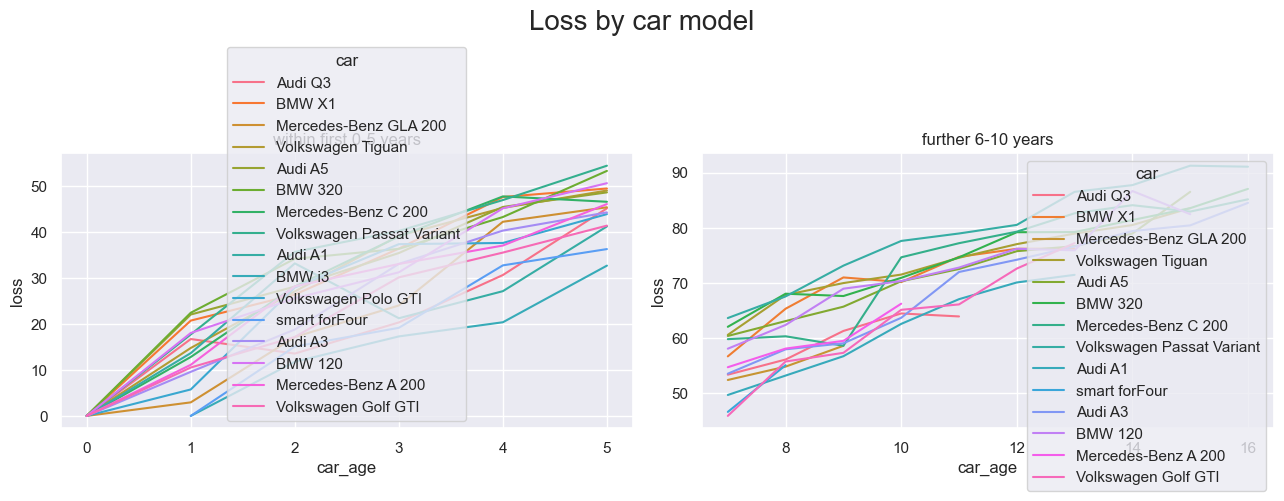

In [113]:
plt.figure(figsize=(13,8))
plt.suptitle('Loss by car model', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="loss",  data=german_loss.query('car_age <6'), hue="car");
plt.title('within first 0-5 years')

plt.subplot(2, 2, 2)  
sns.lineplot(x="car_age", y="loss",  data=german_loss.query('car_age >6'), hue="car");
plt.title('further 6-10 years')

plt.subplots_adjust(top=0.85)
plt.tight_layout();